# Title
## Analysing Customer Retention and Churn Patterns in the Telecom Industry
By Oluwaseun Adeyemi | Setember 30, 2025

# Introduction

In today’s highly competitive telecom industry, customer retention is critical to sustaining growth and profitability. With multiple service providers offering similar packages, retaining customers has become more challenging than ever. Customer churn—the phenomenon where subscribers discontinue their services—represents a significant threat to revenue and market share. 

The dataset under consideration, obtained from [Kaggle](https://www.kaggle.com/datasets/mubeenshehzadi/customer-churn-dataset?select=Telco_Cusomer_Churn.csv), contains information on **7,043 telecom customers** across **21 features**, including demographic details, subscribed services (phone, internet, streaming), billing and payment methods, and whether the customer eventually churned. 

By analyzing these variables, businesses can **identify key drivers of churn**, understand **retention patterns**, and develop **predictive models** that anticipate customer departure. This insight can guide targeted interventions, loyalty programs, and pricing strategies to reduce churn and maximize profitability. 

# Problem Statement

Despite the wide range of services and competitive pricing strategies, telecom companies continue to face high customer churn rates. Losing customers not only reduces revenue but also increases the cost of acquiring new customers to replace them. Without a clear understanding of **which factors contribute most to churn**, telecom operators risk failing to retain valuable customers, misallocating resources, and diminishing long-term profitability.

Therefore, there is a pressing need to analyze customer behavior patterns, identify churn drivers, and build predictive models that can help in proactive retention strategies.

# Objectives

The primary objectives of this study are:

1. **To explore and analyze customer demographics, service usage, and billing information** in relation to churn behavior.
2. **To identify key factors driving churn** (e.g., contract type, internet service, payment method, monthly charges).
3. **To build predictive models** that can accurately classify customers as likely to churn or stay.
4. **To provide actionable insights** that can support telecom companies in designing customer retention strategies, such as personalized offers, service improvements, and targeted loyalty programs.
5. **To evaluate and compare different machine learning models** in predicting churn, ensuring accuracy and interpretability for business use.

# Features Description  

- **customerID**: Unique ID assigned to each customer  
- **gender**: Gender of the customer *(Male, Female)*  
- **seniorcitizen**: Indicates if the customer is a senior citizen *(1 = Yes, 0 = No)*  
- **partner**: Whether the customer has a partner *(Yes/No)*  
- **dependents**: Whether the customer has dependents *(Yes/No)*  
- **tenure**: Number of months the customer has stayed with the company  
- **phoneservice**: Indicates if the customer has a phone service *(Yes/No)*  
- **multiplelines**: If the customer has multiple phone lines *(No, Yes, No phone service)*  
- **internetservice**: Type of internet service *(DSL, Fiber optic, No)*  
- **onlinesecurity**: Whether the customer has online security add-on *(Yes, No, No internet)*  
- **onlinebackup**: Whether the customer has online backup service *(Yes, No, No internet)*  
- **deviceprotection**: Device protection plan *(Yes, No, No internet)*  
- **techsupport**: Tech support service *(Yes, No, No internet)*  
- **streamingTV**: Access to streaming TV *(Yes, No, No internet)*  
- **streamingmovies**: Access to streaming movies *(Yes, No, No internet)*  
- **contract**: Type of contract *(Month-to-month, One year, Two year)*  
- **paperlessbilling**: Whether billing is paperless *(Yes/No)*  
- **paymentmethod**: Customer’s method of payment *(Electronic check, Mailed check, Bank transfer, Credit card)*  
- **monthlycharges**: Amount charged to the customer monthly  
- **totalcharges**: Total amount charged during the customer’s tenure  
- **churn**: Indicates whether the customer left the company *(Yes = churned, No = retained)*  

In [1]:
# import necessary libraries
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the datatset
df = pd.read_csv("Telco_Customer_Churn.csv")

In [3]:
# checking the top 2 rows
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# Data inspection, understanding and cleaning

In [4]:
# checking the summay info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# converting total charges to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

In [6]:
# checking the summay info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Dataset Observations 

**Dataset Size & Structure**

   * The dataset contains **7,043 rows** and **21 columns**, representing individual telecom customers and their attributes.
   * The **memory footprint** is moderate (~1.1 MB), making it manageable for typical data analysis workflows.

**Target Variable**

   * The column `Churn` indicates whether a customer has left the service (`Yes`) or stayed (`No`).
   * All 7,043 entries are non-null, ensuring a complete target column.

**Feature Types**

   * **Categorical Features (17 columns)**: Includes `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, and `customerID`.
   * **Numerical Features (4 columns)**: `SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges`.
   * Note: `TotalCharges` was originally an object type and has been **converted to float** for proper numerical analysis.

**Data Completeness**

   * There are **no missing values** across all 21 columns, which simplifies preprocessing.

**Data Types**

   * Object types dominate (17 columns), which will require encoding before modeling.
   * Two numerical columns are floats (`MonthlyCharges`, `TotalCharges`) and two are integers (`SeniorCitizen`, `tenure`).

**Potential Preprocessing Needs**

   * Encode categorical features (`object` type) for modeling.
   * Scale numerical features for models sensitive to feature magnitude (e.g., MLP).
   * Balance the target variable `Churn` because churn is typically **imbalanced** in telecom datasets.

**Key Insight:** The dataset is **complete** and **well-structured**, with `TotalCharges` now correctly numeric. Preparing features (encoding, scaling, and balancing) will be crucial for building effective predictive models.

# Descriptive Statistics
 - Descriptive statistics was done to: explore, clean, and understand the dataset before building machine learning models. 
 - It helps spot outliers, missing values, skewness, and feature importance patterns early on.

In [7]:
# descriptive statistics
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.73,2266.79,0.00,398.55,1394.55,3786.60,8684.80


# Interpretation and insights

**SeniorCitizen**

   * Mean = **0.16** → Only **16%** of customers are senior citizens.
   * Distribution is highly skewed toward **non-senior customers (84%)**.
   * This indicates the customer base is largely **younger or middle-aged**, which may affect service preferences and churn patterns.

**Tenure (Months with the company)**

   * Mean = **32.37 months (~2.7 years)**, with a standard deviation of **24.56**.
   * Min = **0 months** (new customers) → Max = **72 months (6 years)**.
   * Quartiles:

     * 25% stayed less than **9 months** (high early churn risk).
     * 50% stayed **29 months** (median).
     * 75% stayed more than **55 months**, showing strong retention for long-term customers.
   * **Insight:** Retention improves significantly after the first year. Early months are the most critical for churn.

**MonthlyCharges**

   * Mean = **$64.76**, ranging from **$18.25** to **$118.75**.
   * 25% of customers pay **< $35.5** (basic/low-tier plans).
   * 50% pay about **$70.35** (median).
   * 25% pay **> $89.85**, close to the maximum, likely due to multiple services (fiber optic, streaming).
   * **Insight:** Higher monthly charges may correlate with higher churn if customers perceive poor value.

**TotalCharges**

   * Mean = **$2,279.73**, but highly variable (std = **$2,266.79**).
   * Ranges from **$0 (new customers)** to **$8,684.80 (long-term, high-paying customers)**.
   * Quartiles:

     * 25% paid **< $398.55** (new/short-term customers).
     * 50% paid **$1,394.55**.
     * 75% paid **> $3,786.60**, reflecting long-term subscribers.
   * **Insight:** Customers with low TotalCharges are new/short-tenure customers who are at higher churn risk, while high spenders represent loyal long-term customers.

### Key Insights

* **Churn risk is highest in the first year (tenure < 12 months).**
* **Senior citizens** form a small segment (16%) but may have distinct churn patterns worth analyzing.
* **High monthly charges** could drive dissatisfaction, especially among newer customers.
* **TotalCharges** strongly reflects customer lifetime value (CLV) — low values → at-risk customers, high values → loyal and retained.

# Feature engineering
This is the process of creating, transforming, or selecting features (variables) from raw data to make machine learning models more accurate, interpretable, and efficient.

In [8]:
# checking the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# separating the columns into numerical and categorical
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# Exploratory Data Analysis (Visualization)
Visualization is the process of representing data visually—using charts, graphs, or plots—to make patterns, trends, and insights easier to understand.

## Why It’s Important:

 - Understand Data Quickly: Spot trends, outliers, and relationships at a glance.
 - Communicate Insights: Makes findings clearer for stakeholders or decision-makers.
 - Support Analysis: Helps identify issues like missing values, skewed distributions, or correlations.
 - Guide Modeling: Reveals which features are important or need transformation. In short: Visualization turns raw data into clear, actionable insights, supporting better analysis and decision-making.

# Visualizing the target column - Churn

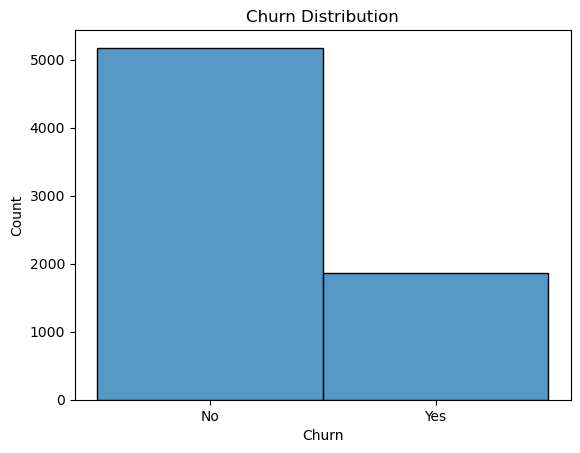

In [12]:
# visualizing the distribution of the target column

sns.histplot(data=df, x="Churn", bins=10)
plt.title("Churn Distribution")
plt.show()

# Interpretation and insights

**Churn Distribution:**

* **No (Retained Customers):** 5,174 (73.46%) 
  The majority of customers stayed with the company, indicating that retention strategies and overall satisfaction are working for most.

* **Yes (Churned Customers):** 1,869 (26.54%) 
  Over a quarter of the customers left the company. In telecom, even single-digit churn percentages can significantly impact revenue, so this is a substantial concern.

**Key Insights:**

1. **High Churn Risk:** Losing 1 in 4 customers is a strong signal that proactive retention measures are necessary.
2. **Retention vs Acquisition Costs:** Acquiring new customers is typically more expensive than retaining existing ones, meaning this churn rate could increase operational costs.
3. **Targeted Interventions Needed:** The churned group should be further analyzed by **contract type, tenure, monthly charges, and service usage** to identify patterns and common drivers.
4. **Benchmarking:** Churn rates above 20% are considered high in subscription-based industries. This dataset shows the company faces retention challenges that must be addressed.

**Class Imbalance:**

* The target column (**Churn**) is imbalanced: 73.5% retained vs 26.5% churned.
* **Implication:** Models trained on this dataset may be biased toward predicting the majority class (**No churn**).
* **Action Required:** The dataset should be balanced (e.g., using **SMOTE** or other resampling techniques) to improve model performance on minority class prediction.

**Overall:**
While the company retains most customers (73.5%), the **26.5% churn rate** is a red flag. Without corrective measures—loyalty programs, personalized offers, or service improvements—this could hurt **long-term profitability**.

# Visualizing the numerical columns and Churn
 - Visualizing numerical features like senior citizen, tenure, monthly charges helps understand their relationship with churn, detect outliers, compare distributions, and confirm feature importance.
 - It also enhances storytelling by translating data into clear, intuitive insights for stakeholders.

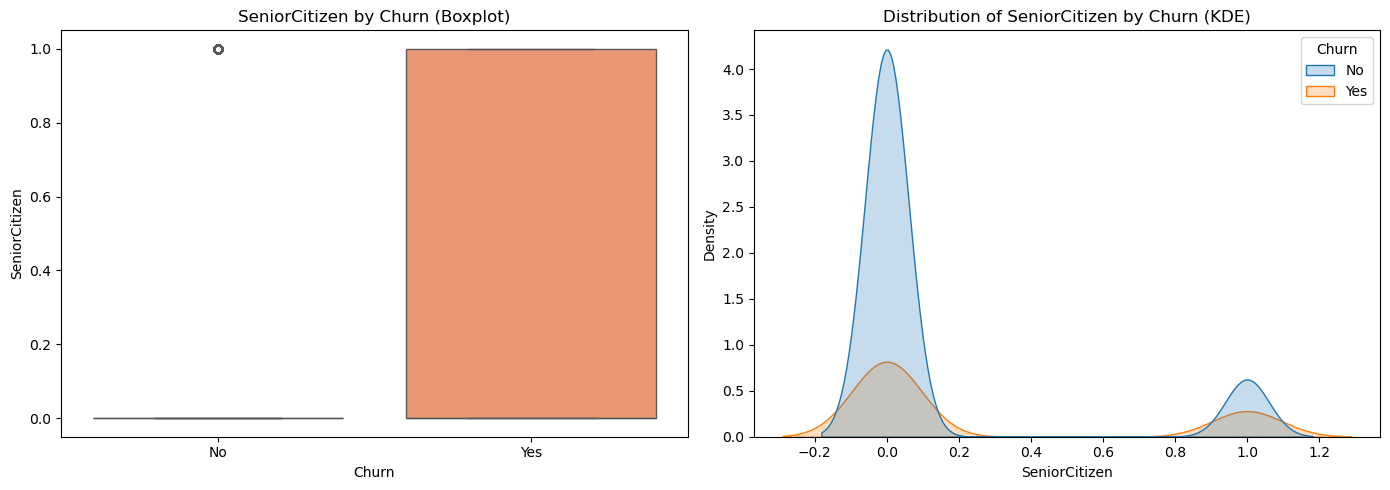


 Churn Summary by SeniorCitizen Quartiles:


,SeniorCitizen_bin,Customers,Churned,Churn Rate (%)
0,"(-0.001, 1.0]",7043,1869,26.54


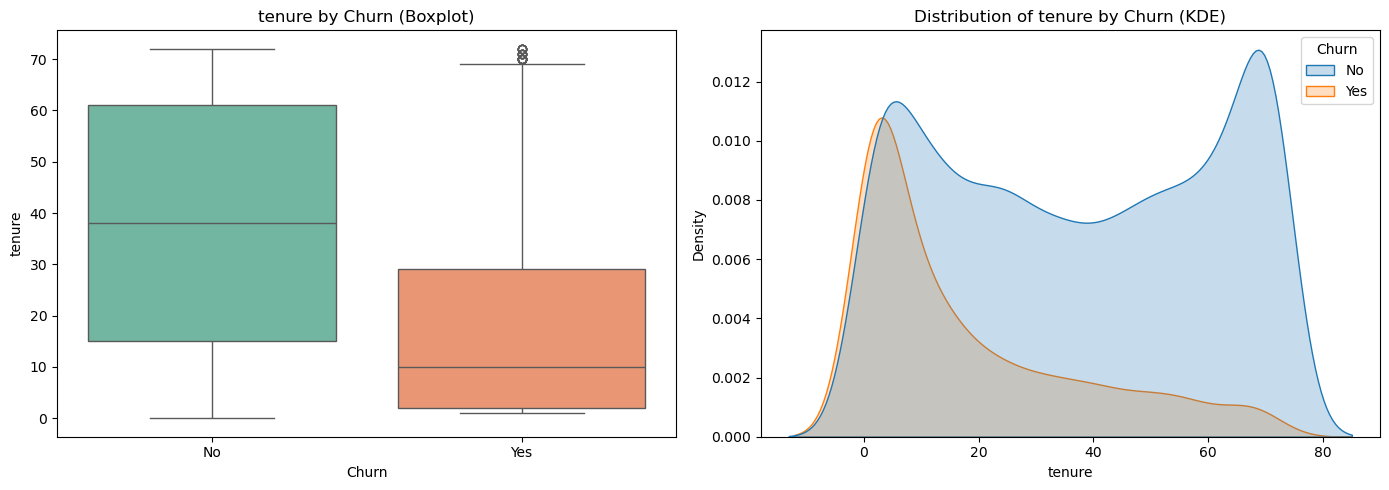


 Churn Summary by tenure Quartiles:


,tenure_bin,Customers,Churned,Churn Rate (%)
0,"(-0.001, 9.0]",1854,923,49.78
1,"(9.0, 29.0]",1715,486,28.34
2,"(29.0, 55.0]",1719,324,18.85
3,"(55.0, 72.0]",1755,136,7.75


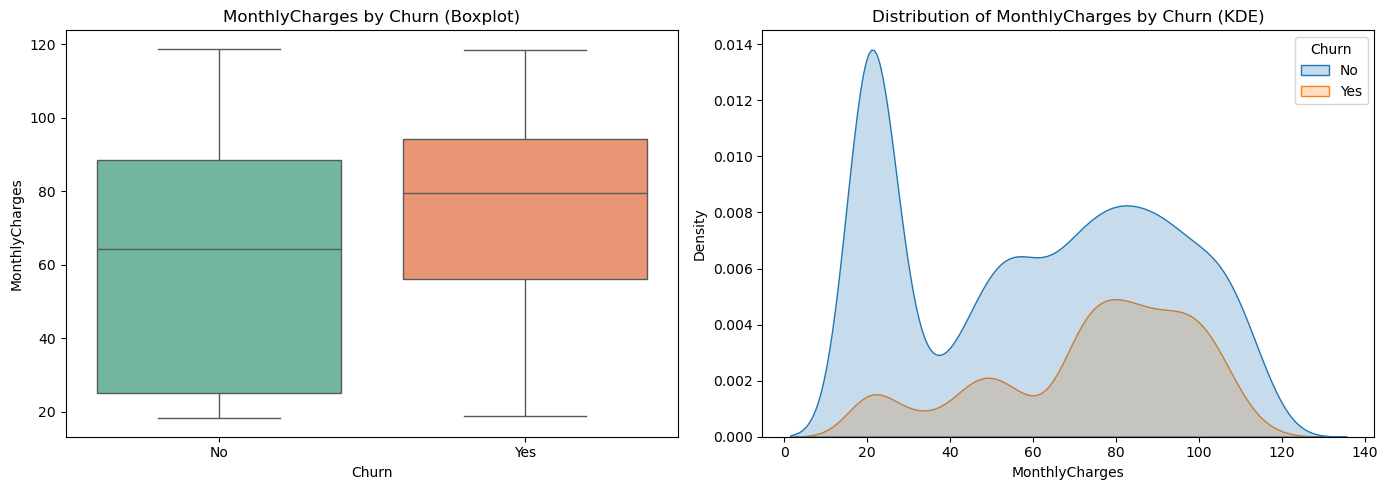


 Churn Summary by MonthlyCharges Quartiles:


,MonthlyCharges_bin,Customers,Churned,Churn Rate (%)
0,"(18.249, 35.5]",1762,198,11.24
1,"(35.5, 70.35]",1766,434,24.58
2,"(70.35, 89.85]",1757,659,37.51
3,"(89.85, 118.75]",1758,578,32.88


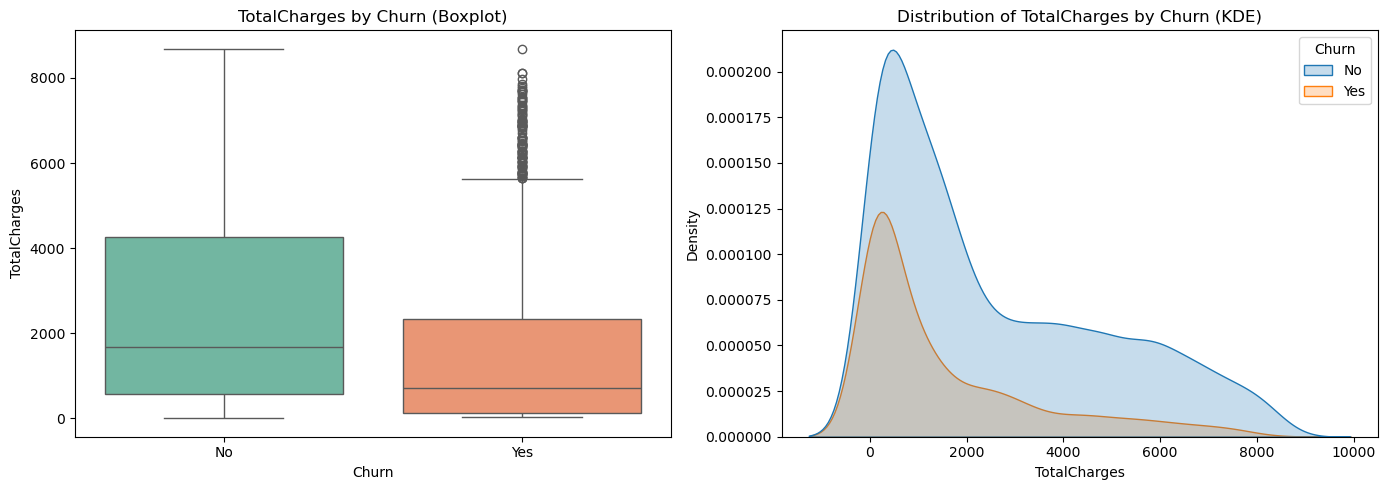


 Churn Summary by TotalCharges Quartiles:


,TotalCharges_bin,Customers,Churned,Churn Rate (%)
0,"(-0.001, 398.55]",1762,762,43.25
1,"(398.55, 1394.55]",1760,447,25.40
2,"(1394.55, 3786.6]",1760,405,23.01
3,"(3786.6, 8684.8]",1761,255,14.48


In [13]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Boxplot
    sns.boxplot(data=df, x="Churn", y=col, palette="Set2", ax=axes[0])
    axes[0].set_title(f"{col} by Churn (Boxplot)")

    # KDE plot
    sns.kdeplot(data=df, x=col, hue="Churn", fill=True, ax=axes[1])
    axes[1].set_title(f"Distribution of {col} by Churn (KDE)")

    plt.tight_layout()
    plt.show()

    # SUMMARY TABLE
    # Bin numeric column into 4 quantiles
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')

    # Calculate churn rate per bin
    summary = (
        df.groupby(f'{col}_bin', observed=False)
          .agg(
              Customers=('Churn', 'count'),
              Churned=('Churn', lambda x: (x == 'Yes').sum())
          )
          .reset_index()
    )
    summary["Churn Rate (%)"] = round((summary["Churned"] / summary["Customers"]) * 100, 2)

    print(f"\n Churn Summary by {col} Quartiles:")
    display(summary)

    # Drop temp bin column
    df.drop(columns=[f'{col}_bin'], inplace=True)

# Interpretation and Insights

### Senior Citizen

* **Bin = (–0.001, 1.0]** → Represents both non-senior (0) and senior (1) customers lumped together.
* **Churn Rate: 26.54% (overall).**
* **Interpretation:** Being a senior citizen by itself doesn’t strongly differentiate churn risk, since the churn rate mirrors the overall churn rate (≈26.5%). Other factors like **contract type, tenure, and charges** likely have stronger influence.

### Tenure

* **0–9 months:** Churn rate = **49.78%** → Nearly half of new customers leave within the first year.
* **9–29 months:** Churn rate drops to **28.34%**.
* **29–55 months:** Falls further to **18.85%**.
* **55–72 months:** Very low churn = **7.75%**.
* **Interpretation:** Customer loyalty grows with tenure. Early-stage customers (especially first year) are **highly at risk**. Retention strategies should focus on **onboarding, engagement, and incentives** for new customers.

### Monthly Charges

* **Low charges (18–35.5):** Churn rate = **11.24%** → Customers with low charges are the most stable.
* **Mid charges (35.5–70.35):** Churn increases to **24.58%**.
* **High charges (70.35–89.85):** **Peak churn** at **37.51%**.
* **Very high charges (89.85–118.75):** Slightly lower at **32.88%**, but still high.
* **Interpretation:** Customers with higher monthly charges churn more (likely due to **perceived high cost vs. value**). Price-sensitive customers are at risk — especially in the **$70–90 range**.

### Total Charges (Lifetime Spending Quartiles)

* **0 – 398.55:** Churn = **43.25%** → Very high churn. Mostly **new/short-tenure customers**.
* **398.55 – 1,394.55:** Churn = **25.40%** → Noticeable improvement in stability.
* **1,394.55 – 3,786.60:** Churn = **23.01%** → Even more stable, customers invested longer.
* **3,786.60 – 8,684.80:** Churn = **14.48%** → **Most loyal, high-value customers.**
* **Interpretation:** Churn **decreases as TotalCharges increase**. New/low-spend customers are the most vulnerable, while long-term high-value customers are the most loyal.

## Overall Insights

1. **Tenure is the strongest predictor:** Early customers (<1 year) are most likely to churn.
2. **Monthly charges drive dissatisfaction:** Higher monthly bills → higher churn, especially $70–90 range.
3. **TotalCharges highlights loyalty:** Higher lifetime spending is strongly tied to retention.
4. **SeniorCitizen is weak on its own:** Doesn’t explain churn differences much, but may interact with tenure and charges.

## Business Actions

* **Retention focus on new customers:** Build stronger onboarding and engagement in first year.
* **Price-sensitive strategies:** Loyalty discounts or tiered pricing for high-bill customers.
* **Upsell & bundle:** Encourage customers to adopt more services early, increasing TotalCharges (lifetime value) and reducing churn.
* **Protect high-value customers:** Reward long-term loyal customers with perks, since they are least likely to churn but most profitable.

# Visualizing the categorical columns with Churn

 - Visualizing categorical columns with Churn helps identify high-risk customer segments, understand relationships between features and churn, guide feature engineering for modeling, and communicate insights to stakeholders. 
 - It highlights which categories have higher churn rates, reveals imbalances, and informs targeted retention strategies

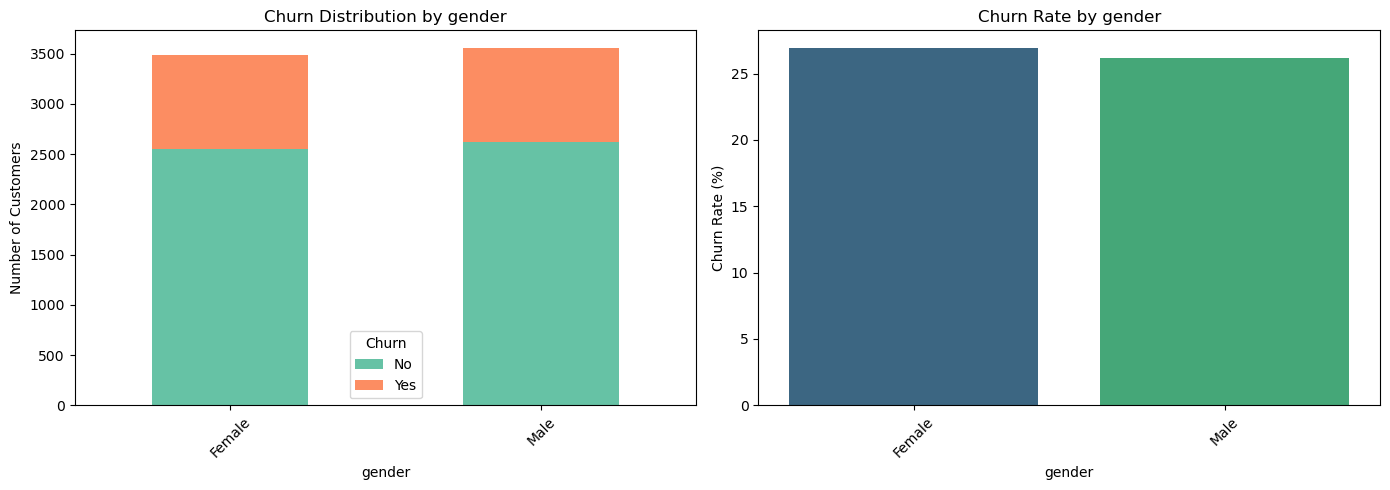

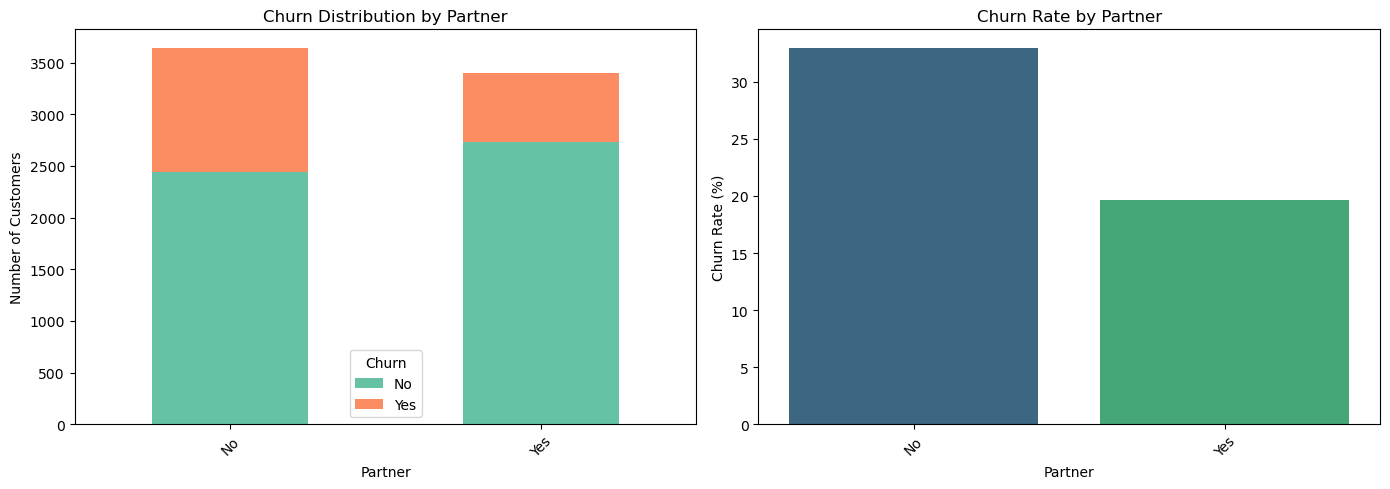

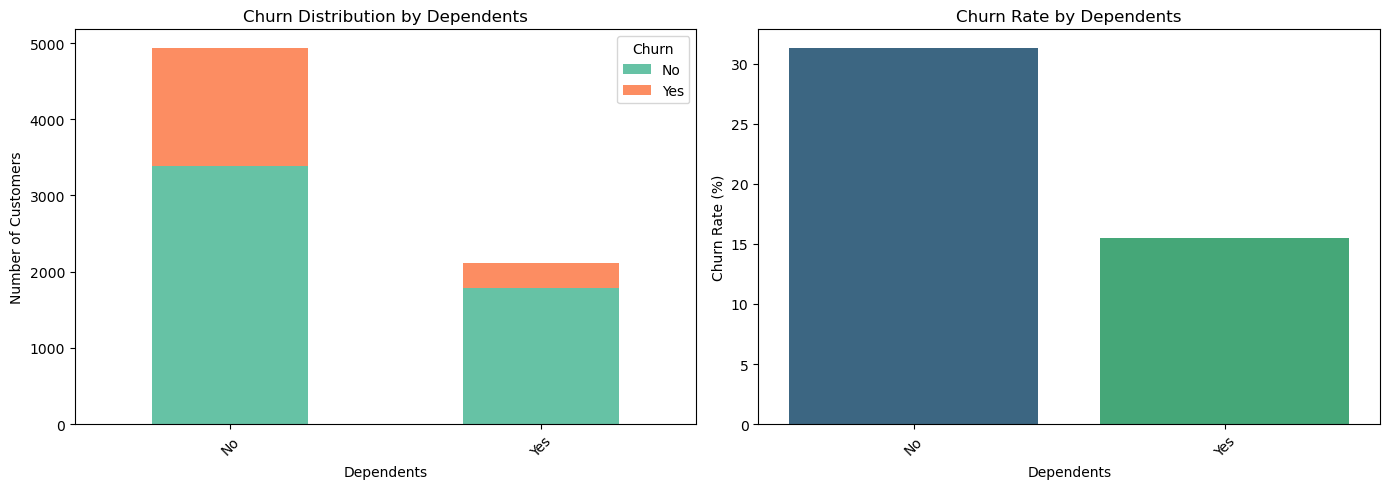

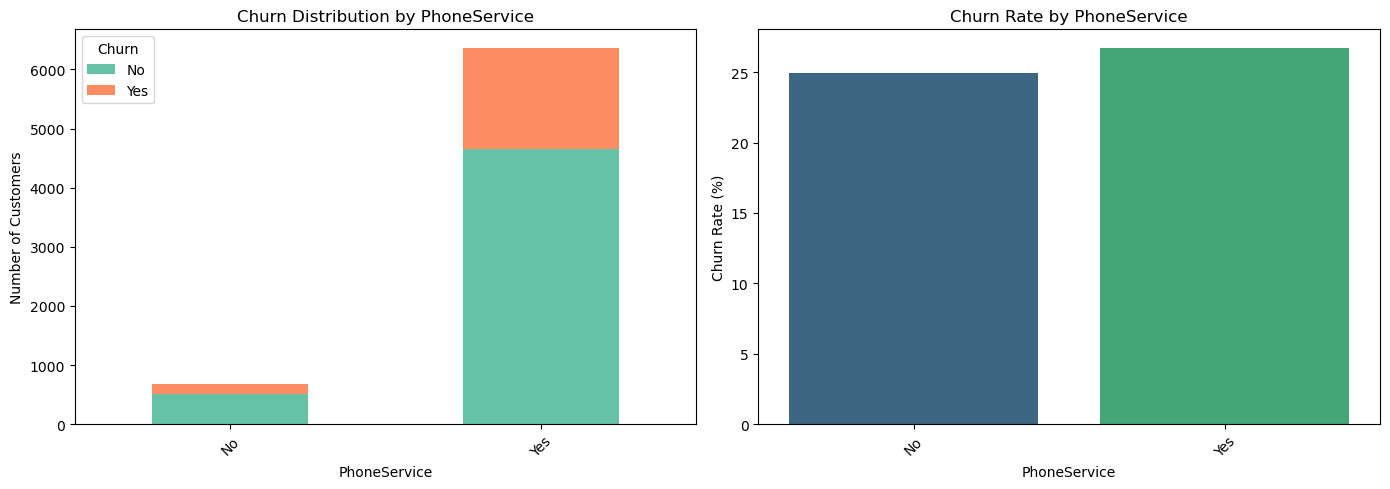

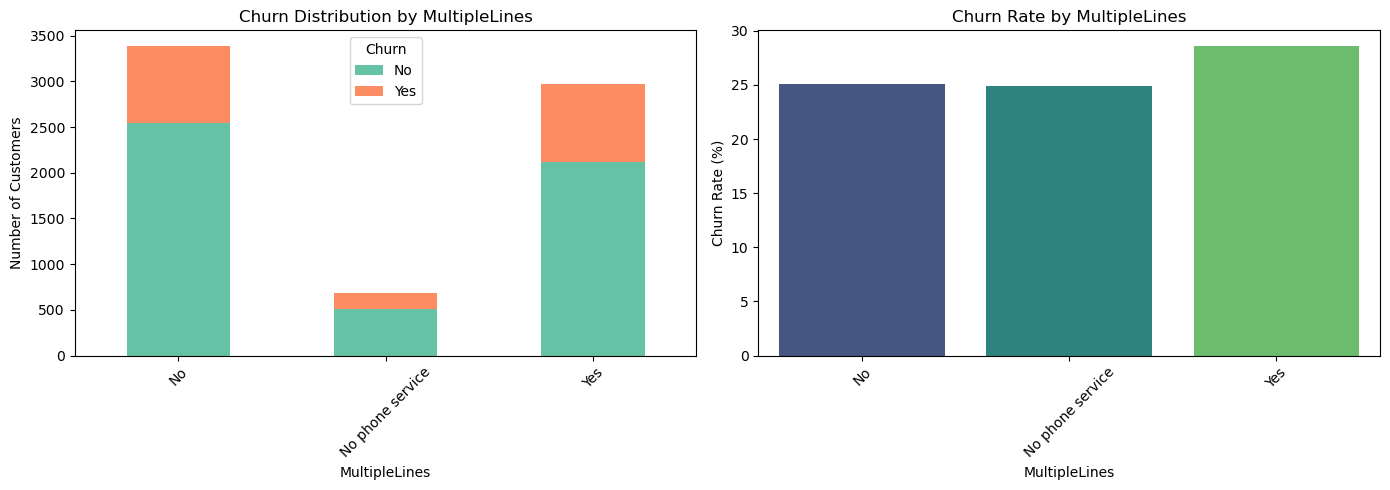

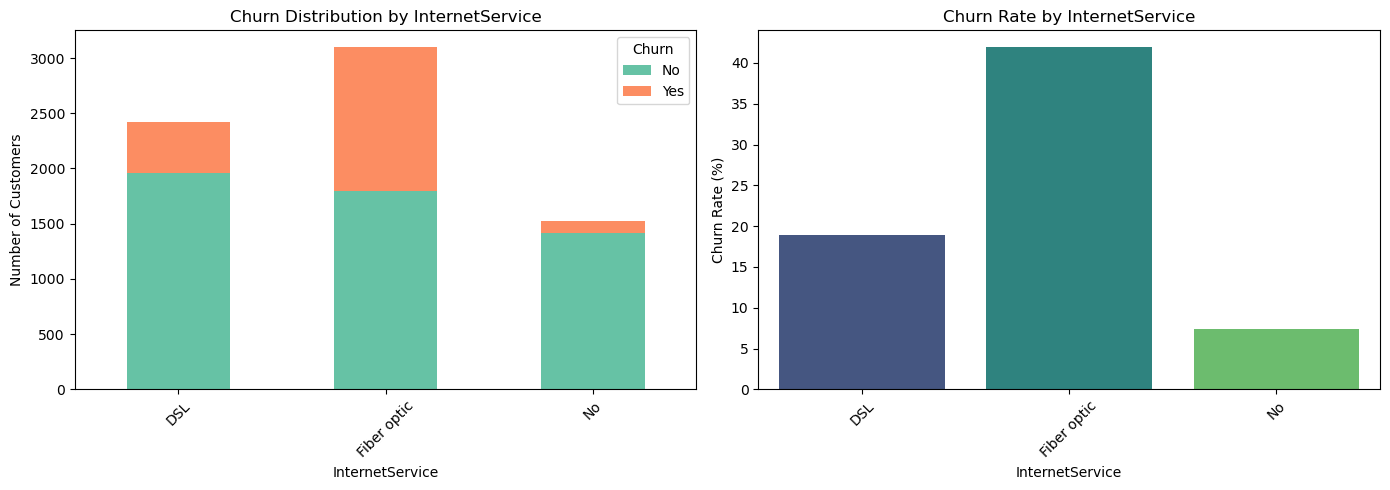

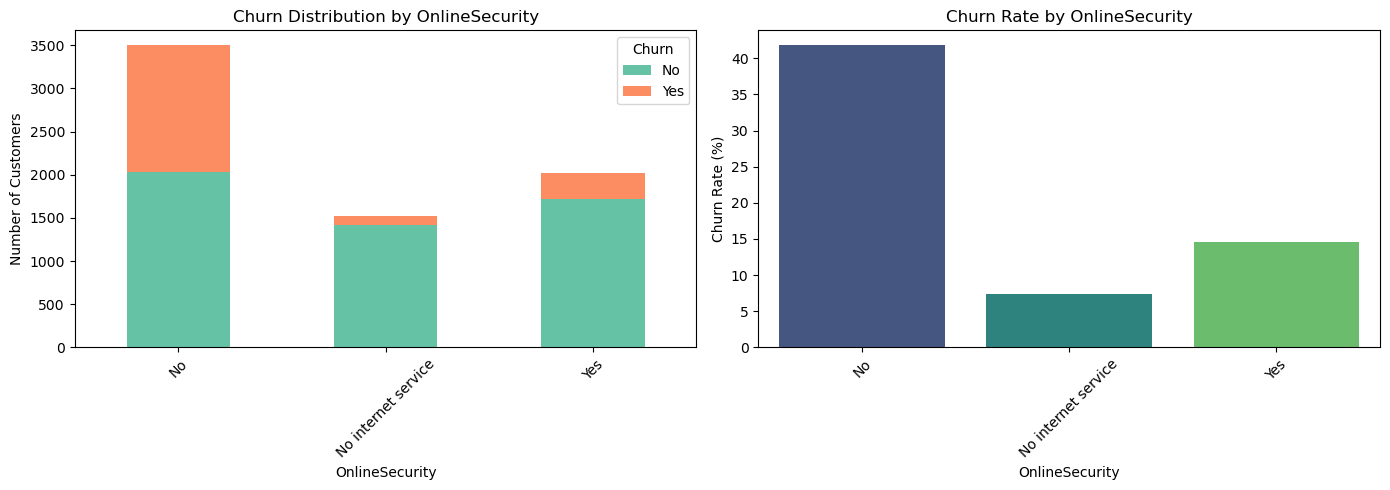

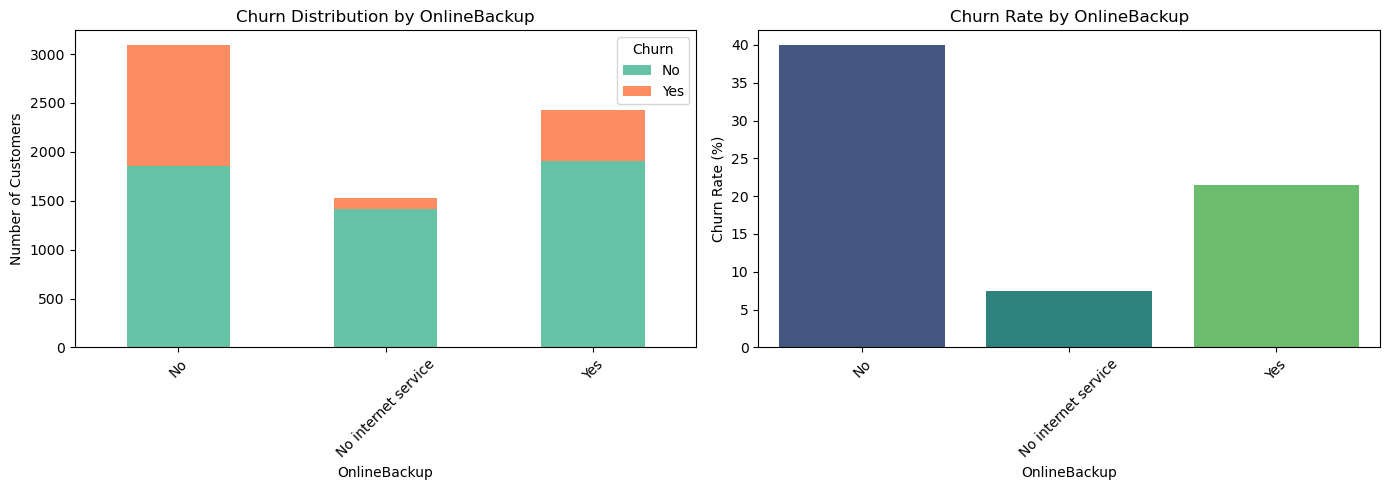

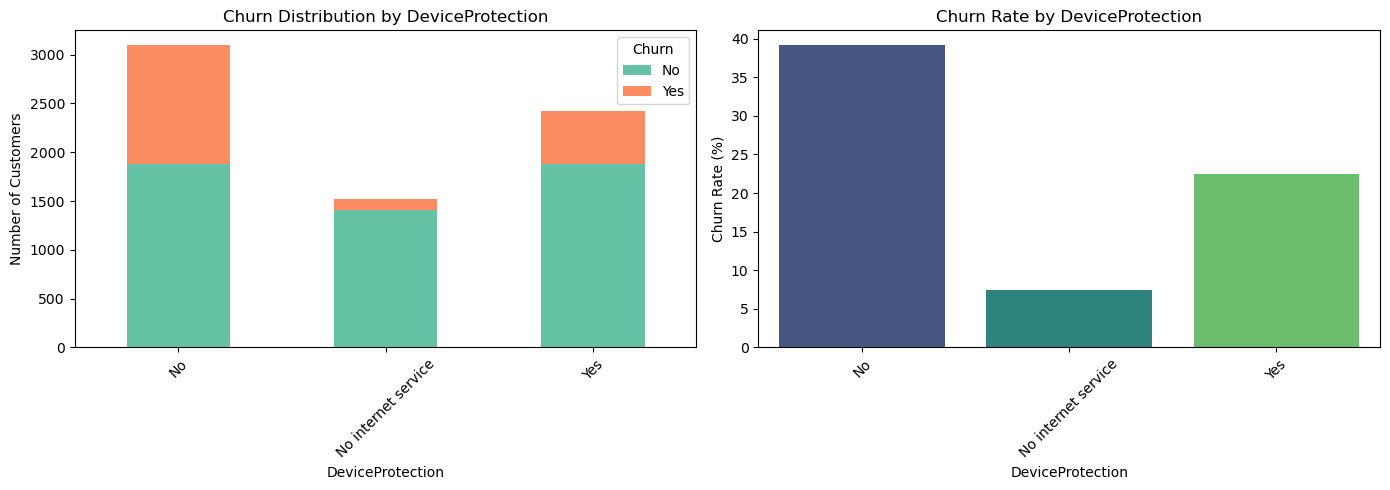

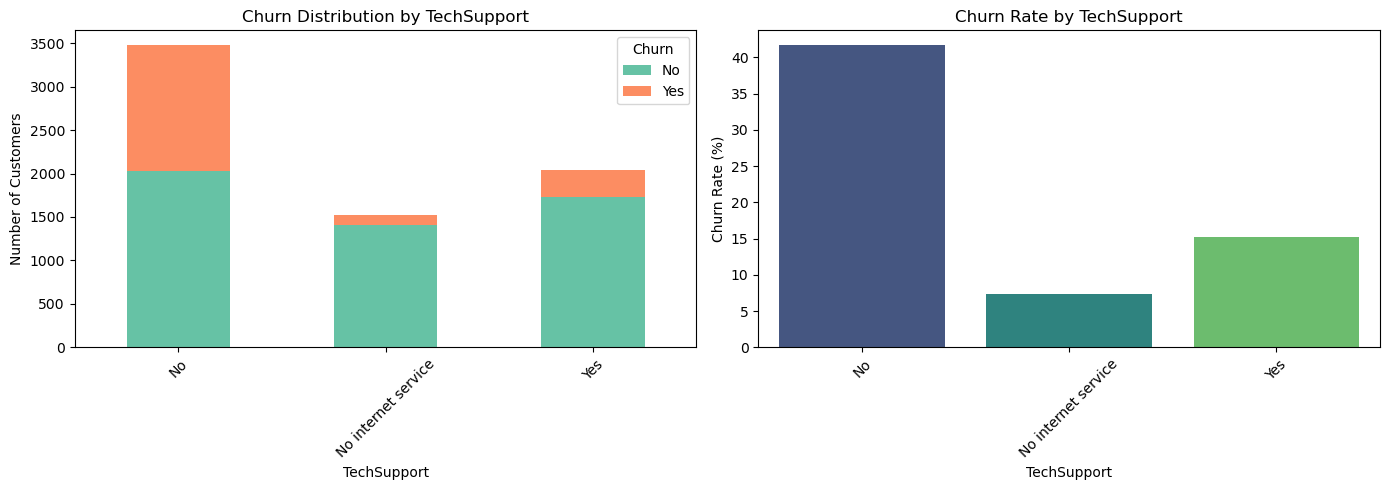

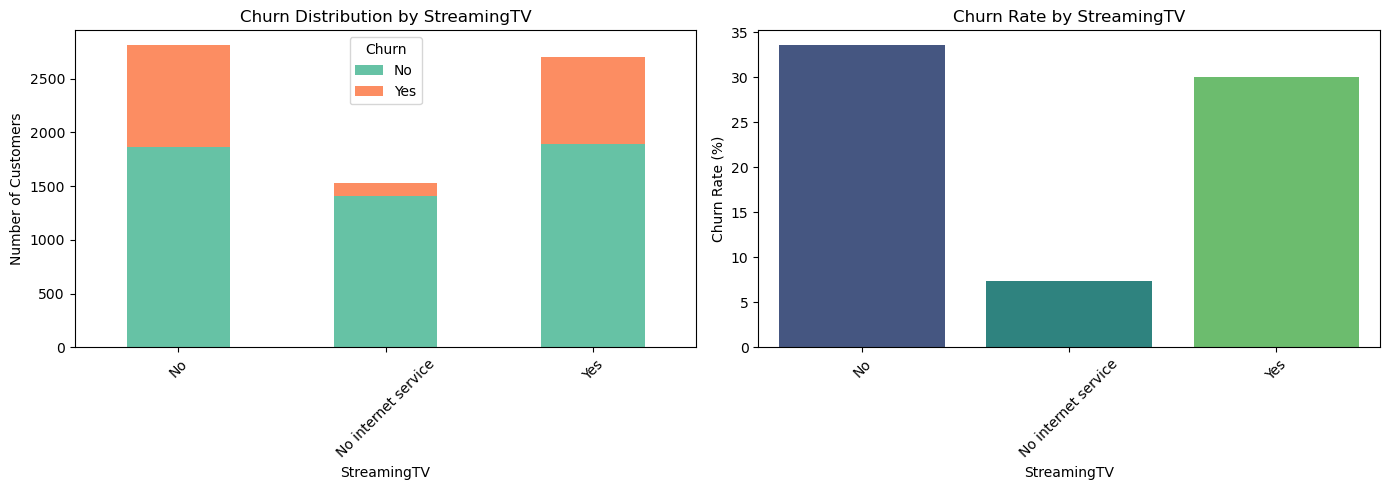

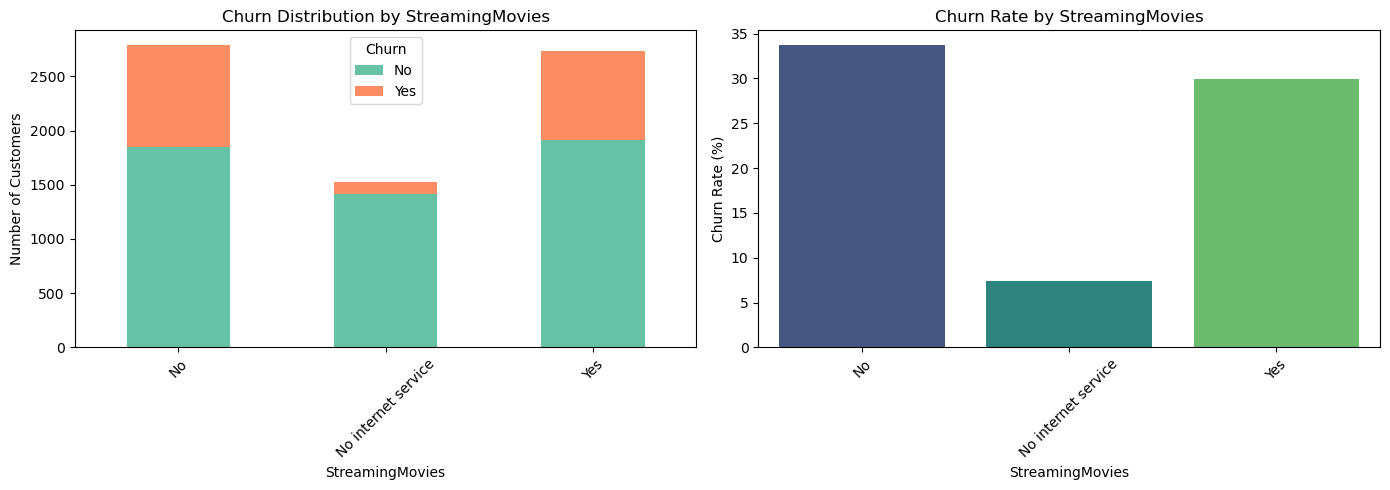

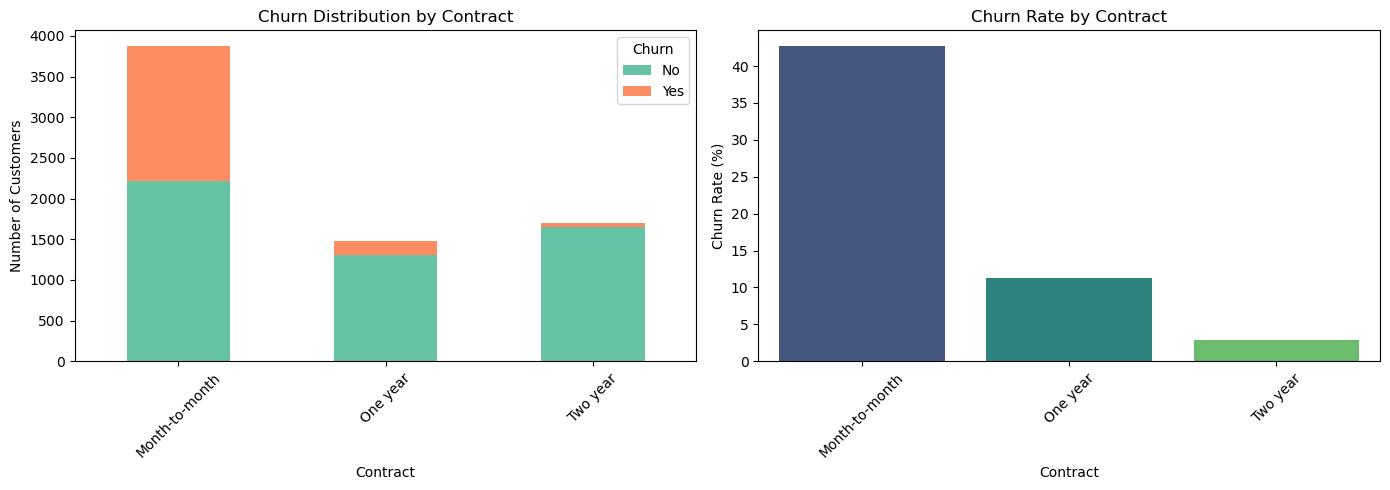

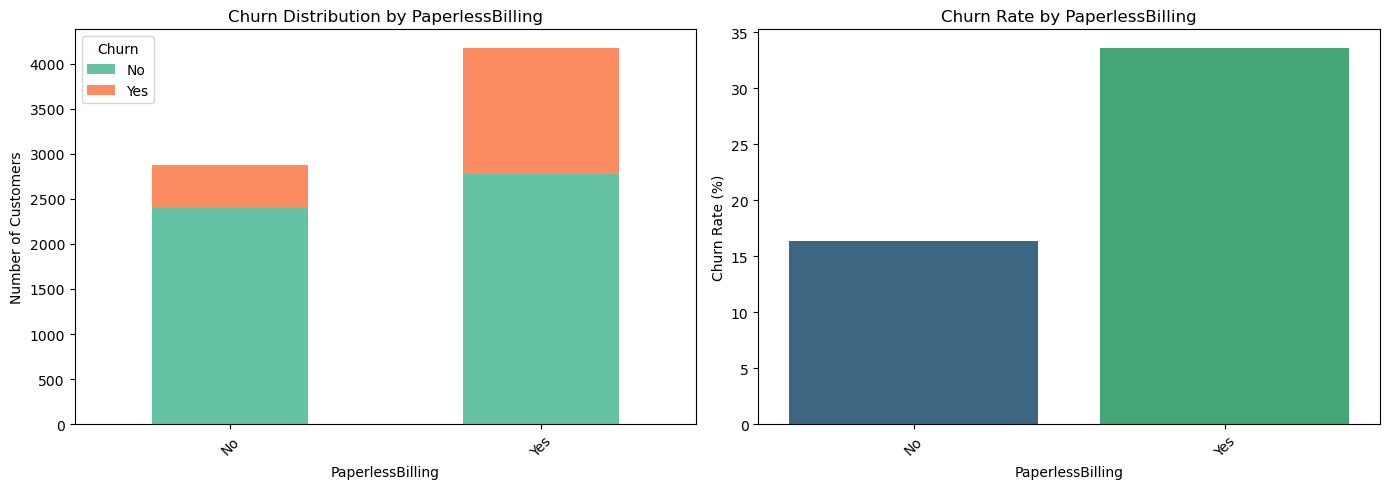

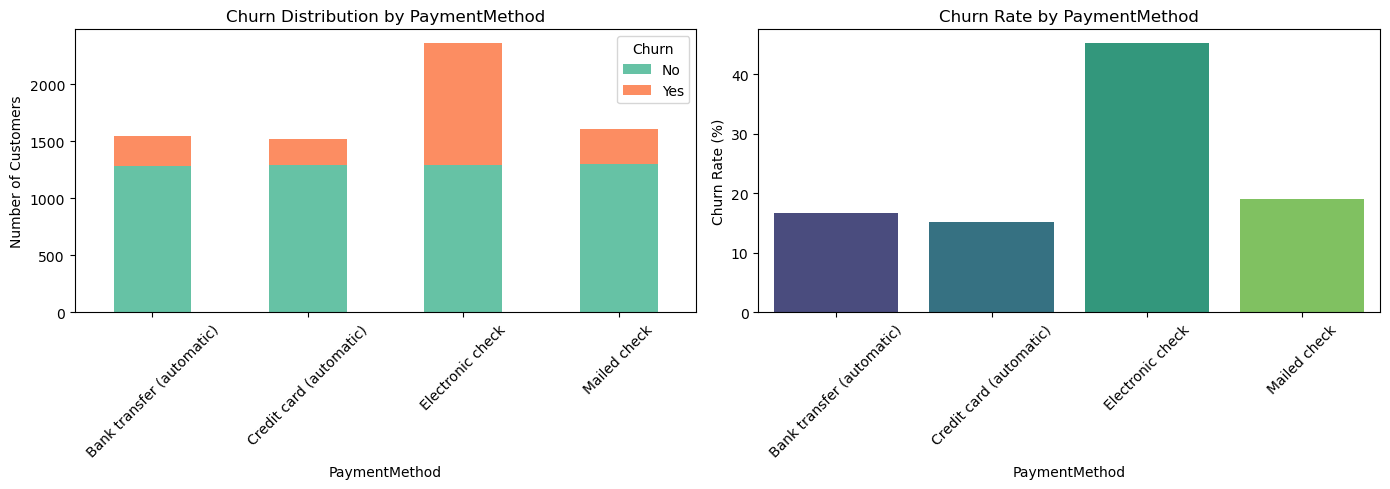

In [14]:
# Convert Churn to numeric for churn rate calculations
df['Churn_num'] = df['Churn'].map({'No':0, 'Yes':1})

# List of categorical columns to explore
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    plt.figure(figsize=(14,5))
    
    # Stacked Bar Plot (Counts)
    plt.subplot(1, 2, 1)
    churn_ct = pd.crosstab(df[col], df['Churn'])
    churn_ct.plot(kind='bar', stacked=True, ax=plt.gca(),
                  color=["#66c2a5", "#fc8d62"])
    plt.title(f"Churn Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Customers")
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    
    # Bar Plot (Churn Rate %)
    plt.subplot(1, 2, 2)
    churn_rate = df.groupby(col)['Churn_num'].mean().reset_index()
    churn_rate['Churn Rate (%)'] = churn_rate['Churn_num'] * 100
    sns.barplot(data=churn_rate, x=col, y='Churn Rate (%)', palette="viridis")
    plt.title(f"Churn Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Churn Rate (%)")
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Interpretations & Insights

### **Gender**

* Female churn rate: **26.9%**, Male: **26.2%**.
    - Gender has **little to no effect** on churn.

### **Partner**

* Customers without a partner churn at **33%**, while those with a partner churn only **~20%**.
   - Having a partner seems to **increase customer stickiness**.

### **Dependents**

* No dependents → **31.3% churn**, With dependents → **15.5% churn**.
   - Customers with dependents are **much more loyal**.

### **Phone Service**

* Little difference: No phone service (24.9%) vs Yes (26.7%).
   - Phone service is **not a strong churn driver**.

### **Multiple Lines**

* Single line: **25.0% churn**, Multiple lines: **28.6% churn**.
   - Having multiple lines slightly **increases churn risk**, possibly due to higher bills.
 
### **Internet Service**

* Fiber optic → **41.9% churn** (highest).
* DSL → **19% churn**.
* No internet → **7.4% churn**.
   - Fiber optic customers are at **highest churn risk**, probably due to **higher charges or competition**.

### **Online Security**

* No security: **41.8% churn**, Yes: **14.6% churn**.
   - Security add-ons **reduce churn risk** significantly.

### **Online Backup**

* No backup: **39.9% churn**, Yes: **21.5% churn**.
   - Backup service also **helps retain customers**.
   
### **Device Protection**

* No protection: **39.1% churn**, Yes: **22.5% churn**.
   - Customers with device protection are **more loyal**.

### **Tech Support**

* No support: **41.6% churn**, Yes: **15.2% churn**.
   - Tech support is one of the **strongest retention factors**.
 
### **Streaming Services (TV & Movies)**

* Churn is **~30–34%** regardless of streaming service.
   - Streaming **does not significantly impact churn**.

### **Contract**

* Month-to-month: **42.7% churn**.
* One year: **11.3% churn**.
* Two year: **2.8% churn**.
   - Contract type is the **strongest churn predictor**. Long-term contracts = **low churn**.                                                                           
 
### **Paperless Billing**

* Paperless → **33.6% churn**, Non-paperless → **16.3% churn**.
   - Paperless billing customers churn **twice as much**, possibly because most paperless users are **month-to-month or online check payers**.

### **Payment Method**

* Electronic check: **45.3% churn** (worst).
* Bank transfer: **16.7%**, Credit card: **15.2%**, Mailed check: **19.1%**.
   - Customers paying by **electronic check are most at risk**, while automatic payments reduce churn.

## Overall Insights

**High-risk groups:**

   * Month-to-month contracts
   * Fiber optic internet users
   * Customers without online security, backup, device protection, or tech support
   * Paperless billing + electronic check payments

**Low-risk groups:**

   * Two-year contracts
   * Customers with dependents or partners
   * DSL or no-internet customers
   * Customers with support services (security, backup, tech support)
   * Automatic payment users

**Retention Strategy:** Target **month-to-month + fiber optic + electronic check** customers with loyalty discounts, service bundles (security/tech support), and incentives to move to longer contracts or auto-pay.

# Correlation Matrix
A Correlation Heatmap is used show how strongly numerical variables are related.

It will help to:

 - Find patterns – spot variables that move together.
 - Detect redundancy – identify features that are too similar (multicollinearity).
 - Guide feature selection – keep useful predictors, drop duplicates.
 - Check data quality – unusual correlations may signal errors.
 - Quick visual insight – colors make patterns obvious.

# Correlation Heatmap (Numerical Features Only)

Showing relationships among the numeric features and churn (encoding churn as 0/1).

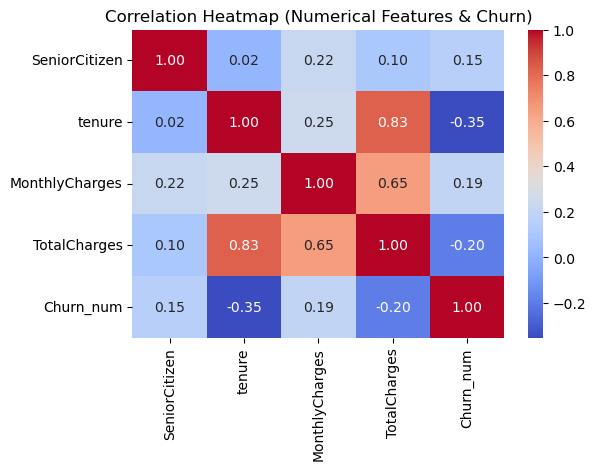

In [15]:
# Encode Churn as numeric
df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Select numerical columns including Churn_num
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_num']

# Correlation matrix
corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features & Churn)")
plt.show()

# Interpretation and insight 

### SeniorCitizen → **Correlation: +0.15**

* Weak positive correlation with churn.
* Seniors are **slightly more likely** to churn than younger customers, but the effect is **not strong**.

### Tenure → **Correlation: –0.35**

* Strongest relationship with churn (negative).
* Customers with **longer tenure are much less likely** to churn.
* Early-tenure customers (especially <12 months) are the **highest churn risk**.

### MonthlyCharges → **Correlation: +0.19**

* Moderate positive correlation with churn.
* Customers with **higher monthly bills are more likely** to churn, likely due to price sensitivity or perceived value mismatch.
* Especially noticeable in the $70–90 charge range.

### TotalCharges → **Correlation: –0.20**

* Moderate negative correlation with churn.
* Since **TotalCharges = tenure × monthly charges**, higher values reflect **longer-staying customers** who are naturally less likely to churn.
* Consistent with tenure being the strongest factor.

## Overall Insights

1. **Tenure is the most important predictor** → customers with short tenure are at the highest churn risk.
2. **High monthly charges increase churn risk** → suggests cost/value concerns.
3. **SeniorCitizen has limited predictive power** alone but may interact with other variables.
4. **TotalCharges reinforces tenure’s importance** (longer customers = lower churn).

## Business Actions

* **Retention focus on early-tenure customers**: onboarding, discounts, proactive engagement in the first year.
* **Price-sensitive customer management**: review billing for those with high monthly charges, offer loyalty discounts.
* **Segmentation strategy**: combine **tenure + monthly charges** to pinpoint the riskiest groups.

# Features to Drop (and Why?)

Deciding which features to drop is a critical step in building a churn model. Based on my churn summaries and correlation analysis, here is the breakdown:

## Features to Drop (and Why)

**CustomerID**

   * Reason: Purely an identifier, carries no predictive value for churn.
   * Action: Drop.

**Highly Correlated / Redundant Features**

   * **TotalCharges** is highly correlated with **tenure** and **MonthlyCharges** (`TotalCharges ≈ tenure × MonthlyCharges`).
   * Reason: Keeping it may introduce **multicollinearity**, which can hurt models like logistic regression.
   * Action: Drop **TotalCharges** (since tenure + MonthlyCharges already capture the effect).

**Categorical Features with Low Predictive Power** (Optional, based on testing)

   * **Gender**: Churn rates are nearly identical (Male ≈ 26.9%, Female ≈ 26.1%).
   * Reason: Adds noise but no real discriminatory power.
   * Action: Consider dropping (test with & without).

**Duplicated / Overlapping Service Features** (Optional, depending on encoding strategy)

   * Example: `PhoneService` vs `MultipleLines`. If `PhoneService=No`, then `MultipleLines=No` automatically.
   * Reason: Redundant info, risk of data leakage in encoding.
   * Action: Drop `PhoneService` and just keep `MultipleLines` (or engineer a clean version).

## Features to Keep

* **Tenure, MonthlyCharges** → strongest churn predictors.
* **Contract, PaymentMethod, PaperlessBilling** → strong churn patterns (e.g., Month-to-Month churn = 42%).
* **InternetService & add-on services (OnlineSecurity, TechSupport, etc.)** → strong influence on churn.
* **Partner & Dependents** → useful, as they show lower churn when present.

## Final Drop List 

* `customerID` (identifier)
* `TotalCharges` (multicollinearity with tenure & MonthlyCharges)
* `gender` (weak signal, almost no churn difference)
* Possibly `PhoneService` (redundant with MultipleLines)

# Label encoding of the target column
Label encoding of the target column is done to convert categorical target values into numerical form so that machine learning models can process them.

In [16]:
# Encoding Churn as numeric (0=No, 1=Yes)
df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Data Preproccessing
 - It cleans and transforms raw data to make it suitable for analysis or modeling.
 - It improves model performance, reduces noise, and ensures consistency and compatibility with algorithms.

In [17]:
# checking the column
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

In [18]:
# Separate features and target
X = df.drop(columns=['Churn', 'Churn_num'])   # drop target(s)
y = df['Churn_num']

In [19]:
# split into training and test data
from sklearn.model_selection import train_test_split

In [20]:
# separating into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# assigning numerical and categorical columns
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

cat_cols = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']

# Creating pipelines
 - It streamlines data preprocessing, feature engineering, and modeling into a single workflow.
 - It ensures efficiency, reproducibility, and easier deployment or experimentation with models.

In [22]:
# importing necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay)

In [23]:
#  building the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [24]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Partner', 'Dependents', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [25]:
# building models
models = {
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200)
}

# Baseline Model Performance
Before applying any data balancing technique, baseline models is trained on the raw dataset.

 - This gives a reference point to measure whether SMOTE (or any other technique) actually improves performance.
 - Without a baseline, one wouldn't know if the changes were beneficial or harmful.

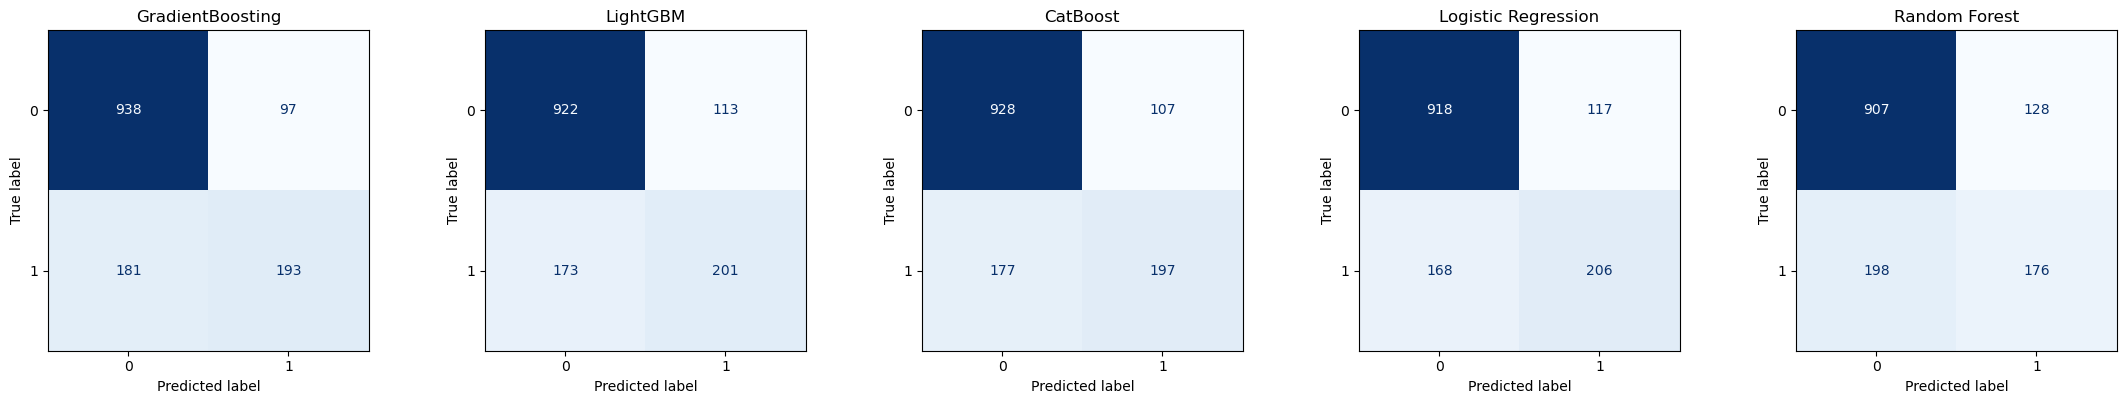


Baseline Model Performance Summary
                     Train Accuracy  Test Accuracy  Test Precision  \
GradientBoosting              0.823          0.803           0.666   
LightGBM                      0.873          0.797           0.640   
CatBoost                      0.869          0.798           0.648   
Logistic Regression           0.805          0.798           0.638   
Random Forest                 0.997          0.769           0.579   

                     Test Recall  Test F1 Score  Test ROC AUC  
GradientBoosting           0.516          0.581         0.844  
LightGBM                   0.537          0.584         0.838  
CatBoost                   0.527          0.581         0.838  
Logistic Regression        0.551          0.591         0.839  
Random Forest              0.471          0.519         0.812  


In [26]:
# Evaluate Models
results = {}
fig, axes = plt.subplots(1, len(models), figsize=(22, 4))  # flexible cols
if len(models) == 1:
    axes = [axes]

for (name, model), ax in zip(models.items(), axes.flatten()): 
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),   
        ('model', model)
    ])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predictions
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # Probabilities for ROC AUC
    test_proba = pipeline.predict_proba(X_test)[:, 1]

    # Store results
    results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Test Precision": precision_score(y_test, test_pred),
        "Test Recall": recall_score(y_test, test_pred),
        "Test F1 Score": f1_score(y_test, test_pred),
        "Test ROC AUC": roc_auc_score(y_test, test_proba)
    }

    # Plot confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)
    ax.grid(False)

plt.tight_layout()
plt.show()

# Results Table
print("\nBaseline Model Performance Summary")
results_df = pd.DataFrame(results).T.round(3)
print(results_df)

# Interpretation and insight

### **Interpretation**

* **Gradient Boosting (Test Acc = 0.803, ROC AUC = 0.844)**
  Balanced performance, good ROC AUC, but recall is a bit low (0.516), meaning it misses some churners.

* **LightGBM (Test Acc = 0.797, ROC AUC = 0.838)**
  Very close to Gradient Boosting. Slightly lower precision (0.640), but a bit better recall (0.537). This makes it slightly better at catching churn cases, though at the cost of more false positives.

* **CatBoost (Test Acc = 0.798, ROC AUC = 0.838)**
  Almost identical to LightGBM in performance. Precision (0.648) is slightly higher, recall (0.527) a bit lower. CatBoost gives a nice trade-off between false positives and false negatives.

* **Logistic Regression (Test Acc = 0.798, ROC AUC = 0.839)**
  Despite being a simpler model, it performs **on par with boosting methods**. Importantly, it has the **highest recall (0.551)**, which means it identifies the largest proportion of actual churners — valuable in churn problems where missing churners can be costly.

* **Random Forest (Test Acc = 0.769, ROC AUC = 0.812)**
  Overfits heavily (Train Acc = 0.997 vs Test Acc = 0.769). Precision and recall are the lowest, showing poor generalization compared to others.


### **Insights**

1. **Best overall models:** Gradient Boosting, LightGBM, CatBoost — very competitive with strong ROC AUC (~0.84).
2. **Best for Recall (catching churners):** Logistic Regression (0.551) — despite being simple, it may be more practical in churn prediction (better at flagging potential churners).
3. **Overfitting risk:** Random Forest shows classic overfitting — excellent training accuracy but poor generalization. Needs tuning (reduce depth, increase regularization).
4. **Trade-off to consider:**

   * If your business values **catching more churners** → prioritize **Logistic Regression** or LightGBM.
   * If your business values **higher precision (fewer false alarms)** → CatBoost slightly edges out others.
5. **Next step:** Fine-tuning boosting models (via GridSearchCV/Optuna) may push ROC AUC >0.85, but Logistic Regression already gives a strong baseline.

**Conclusion:** Logistic Regression is surprisingly strong here and best for recall (critical in churn). Gradient Boosting, LightGBM, and CatBoost are close contenders and may surpass it after tuning. Random Forest underperforms and isn’t reliable without adjustments.

# Handling Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
 - SMOTE only oversamples the training data, so MY test set remains untouched and unbiased.
 - It creates synthetic minority samples, not just duplicates.

In [27]:
# importing necessary library
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(
    preprocessor.fit_transform(X_train), y_train
)

print("Before SMOTE:\n", y_train.value_counts(normalize=True))
print("\nAfter SMOTE:\n", y_train_res.value_counts(normalize=True))

Before SMOTE:
 Churn_num
0    0.734647
1    0.265353
Name: proportion, dtype: float64

After SMOTE:
 Churn_num
0    0.5
1    0.5
Name: proportion, dtype: float64


# Interpretation and insights

### Interpretation

**Before SMOTE (original training data):**

* **73.5% No-Churn (class 0)**
* **26.5% Churn (class 1)**
* The dataset is **imbalanced**, with churners making up only about 1 in 4 customers.
* If left unbalanced, models would tend to favor predicting "No churn" since that would maximize accuracy but miss many actual churners.

**After SMOTE (resampled training data):**

* **50% No-Churn, 50% Churn**
* The dataset is now **perfectly balanced**.
* This ensures the model gives equal attention to both classes, improving its ability to detect churners (higher recall).

### Insights

* The original imbalance explains why baseline models often had **higher precision than recall** (catching some churners but missing many).
* With SMOTE, the model is expected to:

  * **Improve recall** (better at identifying actual churners).
  * Possibly **reduce precision** (more false positives), since it’s now more “sensitive” to churn.
* Overall, SMOTE helps avoid bias toward the majority class and gives a fairer churn prediction model — which is critical for retention strategies.


**Business takeaway:**
Balancing churn vs. non-churn ensures the model is better at catching potential churners. This is important in telecom because **missing a churner is costlier** than mistakenly flagging a loyal customer (false positive).

# Model performance with SMOTE

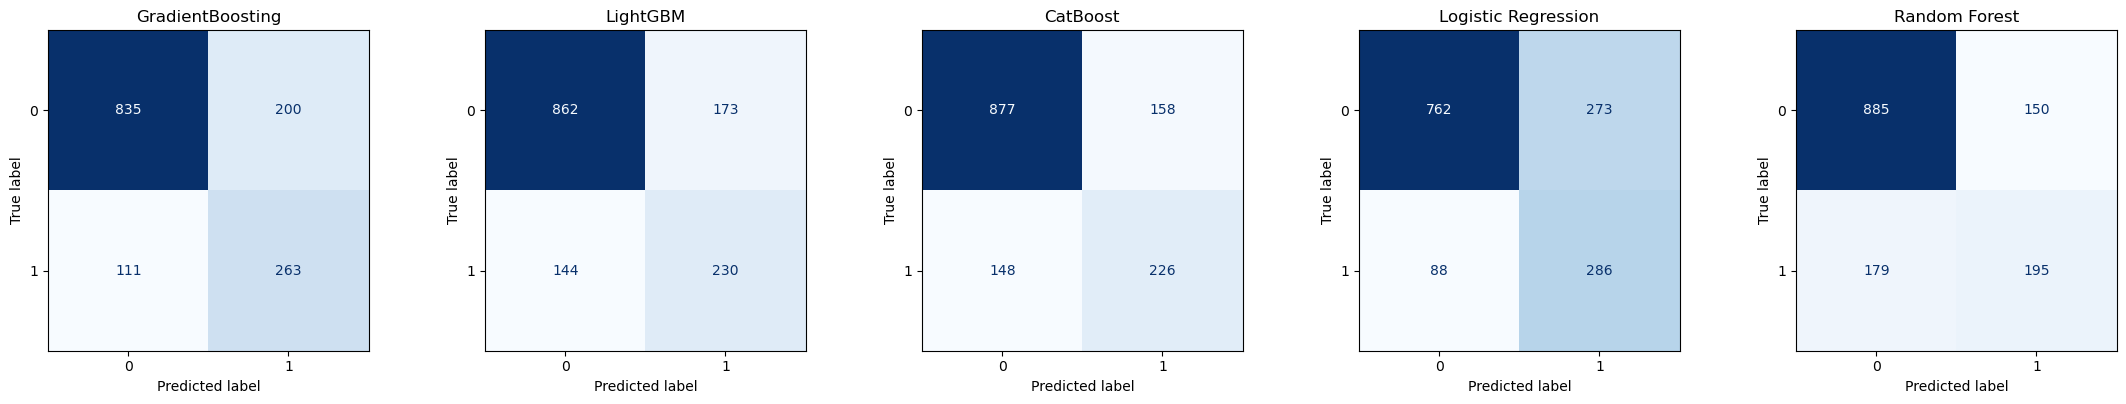


Model Performance with SMOTE


,Accuracy,Precision,Recall,F1 Score,ROC AUC
GradientBoosting,0.779,0.568,0.703,0.628,0.842
LightGBM,0.775,0.571,0.615,0.592,0.834
CatBoost,0.783,0.589,0.604,0.596,0.834
Logistic Regression,0.744,0.512,0.765,0.613,0.837
Random Forest,0.767,0.565,0.521,0.542,0.809


In [28]:
# Train & Evaluate

results = {}
fig, axes = plt.subplots(1, len(models), figsize=(22, 4))  # flexible cols
if len(models) == 1:
    axes = [axes]

for (name, model), ax in zip(models.items(), axes.flatten()): 
    # Fit model directly on resampled data
    model.fit(X_train_res, y_train_res)
    
    # Transform test data (no SMOTE on test set)
    X_test_transformed = preprocessor.transform(X_test)
    
    # Predictions
    test_pred = model.predict(X_test_transformed)
    test_proba = model.predict_proba(X_test_transformed)[:, 1]
    
    # Store results
    results[name] = {
        "Accuracy": accuracy_score(y_test, test_pred),
        "Precision": precision_score(y_test, test_pred),
        "Recall": recall_score(y_test, test_pred),
        "F1 Score": f1_score(y_test, test_pred),
        "ROC AUC": roc_auc_score(y_test, test_proba)
    }
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)
    ax.grid(False)

plt.tight_layout()
plt.show()


# Results Table
results_df = pd.DataFrame(results).T.round(3)
print("\nModel Performance with SMOTE")
display(results_df)

# Interpretation and insight

### **Interpretation**

* **Gradient Boosting (Acc 0.779, ROC AUC 0.842)**
  Very balanced after SMOTE. Precision (0.568) is moderate, but recall jumps to **0.703**, making it the **best recall performer among the boosting models**. Strong at identifying churners without too many false positives.

* **LightGBM (Acc 0.775, ROC AUC 0.834)**
  Recall (0.615) improved compared to baseline, but precision and F1 remain moderate. A good balance, though weaker recall compared to Gradient Boosting.

* **CatBoost (Acc 0.783, ROC AUC 0.834)**
  Highest accuracy overall (0.783), precision (0.589) slightly better than LightGBM, but recall is lower (0.604). This means it predicts churners more accurately when it does, but misses more churn cases compared to Gradient Boosting and Logistic Regression.

* **Logistic Regression (Acc 0.744, ROC AUC 0.837)**
  Recall skyrockets to **0.765 (the best overall)**, meaning it catches most churners. However, precision drops to 0.512, so it also flags more non-churners incorrectly. This is the classic SMOTE effect: Logistic Regression becomes highly sensitive.

* **Random Forest (Acc 0.767, ROC AUC 0.809)**
  Better balanced than before SMOTE, but recall is still the lowest (0.521). It remains the weakest performer compared to boosting models and Logistic Regression.


### **Insights**

**SMOTE impact**:

   * Recall **increased significantly** across models (especially Logistic Regression and Gradient Boosting).
   * Precision generally dropped, which is expected — more positive cases were generated, so the models became more sensitive but less specific.

**Best for Recall (catching churners):**

   * **Logistic Regression (0.765 recall)** → ideal if the business wants to flag as many at-risk customers as possible.

**Best balance between Precision & Recall:**

   * **Gradient Boosting (Recall 0.703, Precision 0.568, ROC AUC 0.842)** → strong recall and good AUC, a safer trade-off.

**Best Accuracy & Precision:**

   * **CatBoost (Acc 0.783, Precision 0.589)** → slightly better at avoiding false positives, but weaker recall.

**Weaker models:**

   * **Random Forest** still lags behind in recall and AUC.
   * **LightGBM** is okay, but doesn’t outperform Gradient Boosting or Logistic Regression in key areas.


**Conclusion:**

* If **catching as many churners as possible is the priority** → **Logistic Regression** with SMOTE is the best option.
* If **balance is more important (good recall + decent precision)** → **Gradient Boosting** is the most reliable.
* If **minimizing false positives is important** → **CatBoost** may be preferred.
* Random Forest is still the weakest performer, even with SMOTE.

# Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the settings (hyperparameters) of a machine learning model to improve its performance. It is used for models that are sensitive to parameters and can benefit from careful optimization.

 - It helps boost accuracy, reduce overfitting, and enhance generalization.
 - Method used is Grid Search and it tests all combinations in a predefined grid.

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline

In [30]:
# Define parameter grids for each model 
# Gradient boosting hyperparameter grid
gb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}

# LightGBM hyperparameter grid
lgbm_param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__num_leaves': [31, 50]
}

# Catboost hyperparameter grid
cat_param_grid = {
    'model__depth': [4, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__iterations': [200, 500]
}

# Logistic Regression hyperparameter grid
logreg_param_grid = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['lbfgs', 'saga'],
    'model__max_iter': [200, 500]
}

# Random Forest hyperparameter grid
rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

In [31]:
# Building pipeline for Gradient Boost and Ada Boost with SMOTE in preprocessing

# Gradient Boosting Pipeline
gb_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),   # encoding + scaling
    ('smote', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# LightGBM Pipeline
lgbm_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LGBMClassifier(random_state=42, verbose=-1))
])

# CatBoost Pipeline
cat_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', CatBoostClassifier(random_state=42, verbose=0))
])

# Logistic Regression Pipeline
logreg_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=500, solver='saga', random_state=42))
])

# Random Forest Pipeline
rf_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42))
])

In [32]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning using GridSearchCV with roc_auc score
# Gradient Boosting 
gb_grid = GridSearchCV(gb_pipe, gb_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_

# LightGBM 
lgbm_grid = GridSearchCV(lgbm_pipe, lgbm_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
lgbm_grid.fit(X_train, y_train)
lgbm_best = lgbm_grid.best_estimator_

# CatBoost
cat_grid = GridSearchCV(cat_pipe, cat_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
cat_grid.fit(X_train, y_train)
cat_best = cat_grid.best_estimator_

# Logistic Regression
logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_

# Random Forest
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [33]:
# Store best tuned models 
tuned_models = {
    "GradientBoosting": gb_best,
    "LightGBM": lgbm_best,
    "CatBoost": cat_best,
    "Logistic Regression": logreg_best,
    "Random Forest": rf_best
}

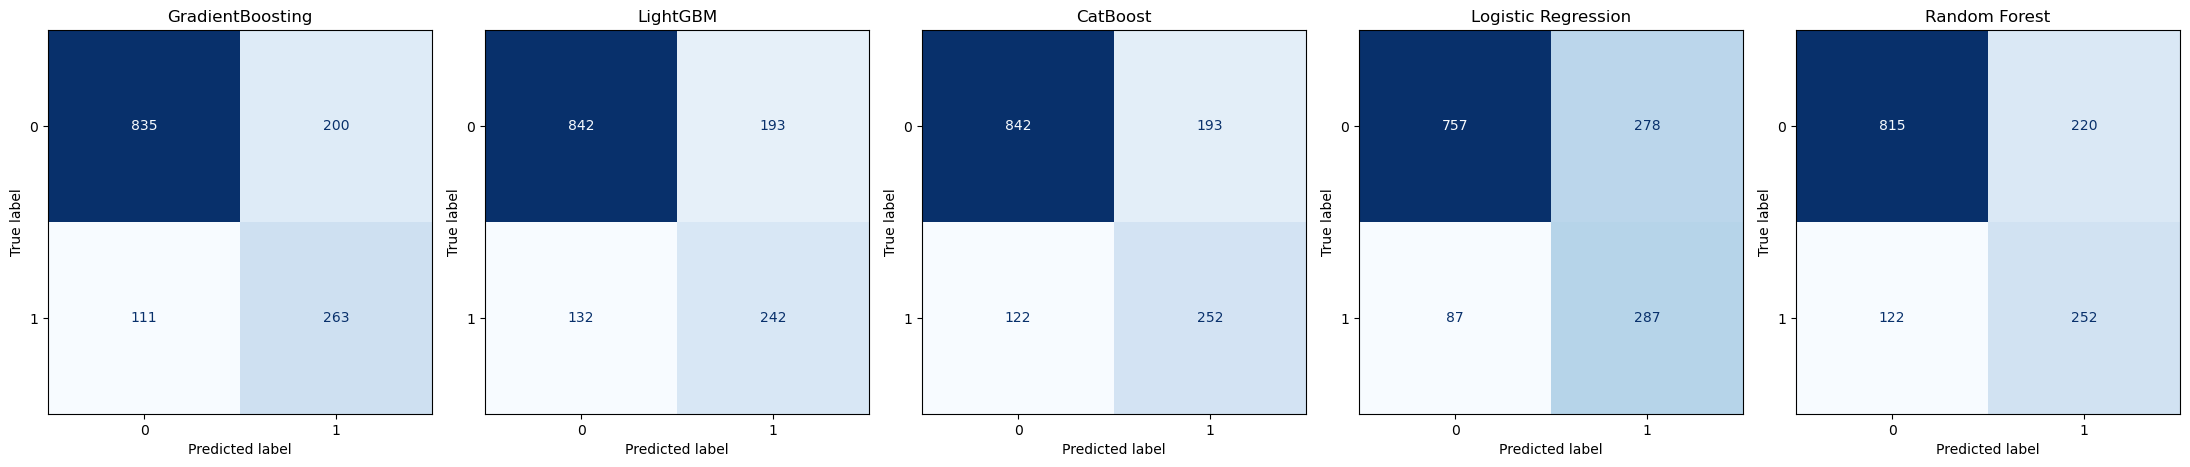


Tuned Model Performance Summary
                GradientBoosting  LightGBM  CatBoost  Logistic Regression  \
Train Accuracy             0.803     0.829     0.803                0.759   
Test Accuracy              0.779     0.769     0.776                0.741   
Test Precision             0.568     0.556     0.566                0.508   
Test Recall                0.703     0.647     0.674                0.767   
Test F1 Score              0.628     0.598     0.615                0.611   
Test ROC AUC               0.842     0.841     0.841                0.838   

                Random Forest  
Train Accuracy          0.826  
Test Accuracy           0.757  
Test Precision          0.534  
Test Recall             0.674  
Test F1 Score           0.596  
Test ROC AUC            0.832  


In [34]:
# Evaluate tuned models 
tuned_results = {}
fig, axes = plt.subplots(1, len(tuned_models), figsize=(22, 5))  # one subplot per model

for (name, model), ax in zip(tuned_models.items(), axes.flatten()):
    # fit again (best_estimator_ already fitted, but ensuring consistency)
    model.fit(X_train, y_train)

    # predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # probabilities
    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # metrics
    tuned_results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Test Precision": precision_score(y_test, test_pred),
        "Test Recall": recall_score(y_test, test_pred),
        "Test F1 Score": f1_score(y_test, test_pred),
        "Test ROC AUC": roc_auc_score(y_test, test_proba)
    }

    # confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"{name}")
    ax.grid(False)

plt.tight_layout()
plt.show()

# Display results in DataFrame 
tuned_results_df = pd.DataFrame(tuned_results).round(3)
print("\nTuned Model Performance Summary")
print(tuned_results_df)

# Interpretation and Insights

### Interpretation of Resul

**Gradient Boosting (GBM)**

   * **Best Recall (0.703)** among all tuned models, meaning it identifies more churners correctly.
   * Balanced trade-off between **Precision (0.568)** and **Recall (0.703)**, giving the **highest F1 score (0.628)**.
   * **Best ROC AUC (0.842)**, showing strong overall discrimination between churn vs. non-churn customers.
      - This makes GBM the **most reliable tuned model** for churn prediction.

**LightGBM**

   * Very competitive with GBM, achieving **ROC AUC of 0.841** (almost the same as GBM).
   * Slightly lower **Recall (0.647)** compared to GBM, but maintains good overall balance.
      - LightGBM is efficient and nearly as strong as GBM, a good alternative if speed/scalability is key.

**CatBoost**

   * Performs consistently, with **Accuracy (0.776)** and **ROC AUC (0.841)** similar to GBM and LightGBM.
   * Slightly weaker F1 score (0.615), but overall still competitive.
      - CatBoost is a **stable performer** and good at handling categorical variables without heavy preprocessing.

**Logistic Regression**

   * **Highest Recall (0.767)** of all models → best at catching churners, but at the cost of lower **Precision (0.508)**.
   * F1 score (0.611) and ROC AUC (0.838) are respectable, showing it’s still effective.
      - Logistic Regression is **simple, interpretable, and recall-focused**, useful if you prefer a transparent model.

**Random Forest**

   * Balanced but not the top performer: **ROC AUC = 0.832**, slightly lower than boosting models.
   * Precision (0.534) and Recall (0.674) are decent, giving an F1 score (0.596).
      - Random Forest is **good overall**, but boosting models outperform it in this dataset.

### Insights for Business / Decision-Making

* **Gradient Boosting is the best overall model** → it balances Precision, Recall, and ROC AUC, making it reliable for deployment.
* **Logistic Regression is best if Recall is more important** (e.g., when it’s critical to identify as many churners as possible, even at the risk of false alarms).
* **Boosting models (GBM, LightGBM, CatBoost) outperform Random Forest** in both accuracy and AUC, confirming that boosting handles churn data patterns better.
* **Random Forest and Logistic Regression** still provide value:

  * Random Forest for **robustness** (less sensitive to noise).
  * Logistic Regression for **simplicity and interpretability** (easier to explain to stakeholders).


**Recommendation**: Deploy **Gradient Boosting (or LightGBM)** as the main model, with **Logistic Regression** as a backup for interpretability and recall-oriented use cases.

# Cross-Validation 

This is done for:

* **Stability of Metrics:** Your current results are based on a single train-test split. CV evaluates model performance across multiple splits, reducing variance and giving a more reliable estimate.
* **Prevents Overfitting:** Models like GradientBoosting, CatBoost, and LightGBM can overfit the training data. CV checks performance on multiple unseen subsets to ensure generalization.
* **Better Hyperparameter Tuning:** When you tune models (GridSearchCV, RandomizedSearchCV), CV ensures that the chosen parameters work well across multiple folds, not just one split.

* My current tuned models (CatBoost, GradientBoosting, LightGBM) perform well on the test set, but without CV, you **cannot be certain these metrics will hold on new unseen data**.
* Implementing CV will give me **confidence in model stability** and help justify deployment decisions to stakeholders.

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Stratified 5-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Include all tuned models
models_to_cv = {
    "CatBoost": tuned_models["CatBoost"],
    "GradientBoosting": tuned_models["GradientBoosting"],
    "LightGBM": tuned_models["LightGBM"],
    "Logistic Regression": tuned_models["Logistic Regression"],
    "Random Forest": tuned_models["Random Forest"]
}

cv_results = []

for name, model in models_to_cv.items():
    accuracies, precisions, recalls, f1s, aucs = [], [], [], [], []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        
        # Neural networks and some models may not have predict_proba
        try:
            y_proba = model.predict_proba(X_val)[:, 1]
            auc_score = roc_auc_score(y_val, y_proba)
        except:
            # fallback: use decision_function if available
            try:
                y_scores = model.decision_function(X_val)
                auc_score = roc_auc_score(y_val, y_scores)
            except:
                auc_score = np.nan
        
        accuracies.append(accuracy_score(y_val, y_pred))
        precisions.append(precision_score(y_val, y_pred))
        recalls.append(recall_score(y_val, y_pred))
        f1s.append(f1_score(y_val, y_pred))
        aucs.append(auc_score)
    
    cv_results.append({
        "Model": name,
        "Accuracy": round(np.mean(accuracies), 3),
        "Precision": round(np.mean(precisions), 3),
        "Recall": round(np.mean(recalls), 3),
        "F1": round(np.mean(f1s), 3),
        "ROC_AUC": round(np.nanmean(aucs), 3)
    })

cv_summary_df = pd.DataFrame(cv_results)
print("Stratified 5-Fold CV Summary Table")
display(cv_summary_df)

Stratified 5-Fold CV Summary Table


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,CatBoost,0.789,0.589,0.675,0.629,0.846
1,GradientBoosting,0.787,0.584,0.688,0.632,0.845
2,LightGBM,0.787,0.592,0.639,0.614,0.838
3,Logistic Regression,0.760,0.532,0.778,0.632,0.844
4,Random Forest,0.782,0.573,0.704,0.631,0.838


# Interpretation and Insights

### Model Performance Insights

**Overall Accuracy**

* Accuracy ranges from **0.760 (Logistic Regression)** to **0.789 (CatBoost)**.
* Boosting models (CatBoost, GradientBoosting, LightGBM) **slightly outperform Logistic Regression and Random Forest** in terms of raw accuracy.


**Precision vs Recall Trade-off**

* **Logistic Regression** → Lowest **precision (0.532)** but the **highest recall (0.778)** → meaning it catches more churners but at the cost of more false positives.
* **Random Forest** → Balanced **recall (0.704)** and precision (0.573).
* **Boosting models** (CatBoost, GradientBoosting, LightGBM) → Better balance with **precision ≈ 0.59** and **recall ≈ 0.64–0.69**.


**F1 Score (Balance of Precision & Recall)**

* All models are very close (**0.614–0.632**).
* **GradientBoosting, Logistic Regression, and Random Forest** achieve the highest F1 (≈0.632), showing strong **overall balance**.
* **CatBoost** is slightly behind at **0.629**, still competitive.


**ROC AUC (Discrimination Power)**

* All models perform strongly with **ROC AUC ≈ 0.84–0.846**.
* **CatBoost (0.846)** and **GradientBoosting (0.845)** are marginally the best at ranking churn vs non-churn customers.
* Logistic Regression also remains competitive with **0.844**, showing it’s still a reliable baseline.


### **Key Insights**

**Best Balanced Performer → GradientBoosting**

   * High recall (0.688) + good precision (0.584) + top F1 (0.632).
   * Very competitive AUC (0.845).

**Best for Catching Churners → Logistic Regression**

   * Recall **0.778** = finds the most churners, even if it sacrifices precision.
   * Good option if the **cost of missing churners is high**.

**Best Raw Accuracy → CatBoost (0.789)**

   * Slight edge in accuracy and ROC AUC.
   * Strong choice for deployment if balanced metrics are acceptable.

**Random Forest → Solid Middle Ground**

   * Recall (0.704) and F1 (0.631) show good stability, though not the very best.
   * Works well but slightly weaker than boosting methods.


### **Business Implication**

* If the goal is **customer retention** (don’t miss churners) → **Logistic Regression** is best.
* If the goal is **balanced precision and recall with strong AUC** → **GradientBoosting or CatBoost** are top candidates.
* If interpretability is important → **Logistic Regression** offers simplicity with strong recall.

# Comparing the four results

Comparing results tells which model works best, why it works, and how it can drive business decisions.

**Purpose of Comparing Model Results**

1. **Assess Improvements:** Shows the impact of SMOTE, tuning, or preprocessing on performance.
2. **Understand Trade-offs:** Highlights precision vs recall and overall balance (F1, ROC AUC).
3. **Select Best Model:** Helps choose the model that aligns with business goals (catch churners vs minimize false alerts).
4. **Communicate Insights:** Provides clear, actionable evidence for stakeholders to guide retention strategies.

**Baseline Models**

* **Accuracy high (≈0.80)** for GradientBoosting, LightGBM, CatBoost, Logistic Regression.
* **Precision high** (0.64–0.66) but **Recall low** (≈0.51–0.55).
* Random Forest overfits (**Train Acc 0.997** vs Test 0.769).
* Models tend to **favor precision over recall**, meaning they predict fewer churners correctly.

 - **Problem:** High chance of **false negatives** (missing churners).

**With SMOTE**

* **Recall improves significantly**:

  * GradientBoosting jumps from **0.516 → 0.703**,
  * Logistic Regression from **0.551 → 0.765**,
  * Random Forest from **0.471 → 0.521**.
* **Precision drops slightly**, as expected (SMOTE creates synthetic minority samples).
* **F1 score improves overall**, indicating a better balance.

 - **Impact:** SMOTE helps the models become **more sensitive to churners**, which is critical for business retention.


**Tuned Models**

* **Accuracy stabilizes** (0.74–0.78).
* **GradientBoosting:** best trade-off, with Recall (0.703) and F1 (0.628).
* **Logistic Regression:** again shows **highest Recall (0.767)**, but lower precision.
* **Random Forest:** more balanced but slightly behind in ROC AUC.
* **ROC AUC scores (0.832–0.842)** show strong discrimination across all tuned models.

 - **Impact:** Hyperparameter tuning makes models more balanced and avoids overfitting, especially for Random Forest.


**Stratified 5-Fold CV**

* Confirms **generalization** of tuned models.
* **CatBoost, GradientBoosting, LightGBM:** Accuracy ≈ 0.787–0.789, AUC ≈ 0.838–0.846.
* **Logistic Regression:** Highest Recall (0.778) but lower precision.
* **Random Forest:** Good balance, Recall (0.704), F1 (0.631).
* Boosting models dominate in **ROC AUC**, Logistic Regression dominates in **Recall**, Random Forest provides **consistency**.

 - **Impact:** Cross-validation confirms the earlier findings:

* Boosting models are **best overall**.
* Logistic Regression is **best for not missing churners**.
* Random Forest is **decent but not leading**.


**Overall Comparison**

| Stage        | Strength         | Weakness                | Key Insight                                                          |
| ------------ | ---------------- | ----------------------- | -------------------------------------------------------------------- |
| **Baseline** | High Precision   | Low Recall              | Models miss churners.                                                |
| **SMOTE**    | High Recall      | Lower Precision         | Better balance; avoids false negatives.                              |
| **Tuned**    | Balanced metrics | Slight drop in accuracy | GradientBoosting shines, Logistic Regression = best recall.          |
| **CV**       | Stable & robust  | Confirms trade-offs     | Boosting = best overall, Logistic = best recall, RF = middle ground. |


**Final Insights**

1. **If the goal is maximum churn detection (recall):** Use **Logistic Regression**.
2. **If the goal is best overall balance:** **GradientBoosting or CatBoost**.
3. **If interpretability & speed matter:** Logistic Regression remains a strong choice.
4. **Random Forest** is reliable but slightly weaker compared to boosting.

# ROC curves for tuned models

* ROC Curve (Receiver Operating Characteristic) shows how well each model separates churners vs non-churners across thresholds.
* Since ROC AUC scores are close (0.832–0.846), the curve will reveal subtle differences in separability.
* It allows you to visually compare trade-offs between sensitivity (Recall/TPR) and 1-Specificity (FPR).

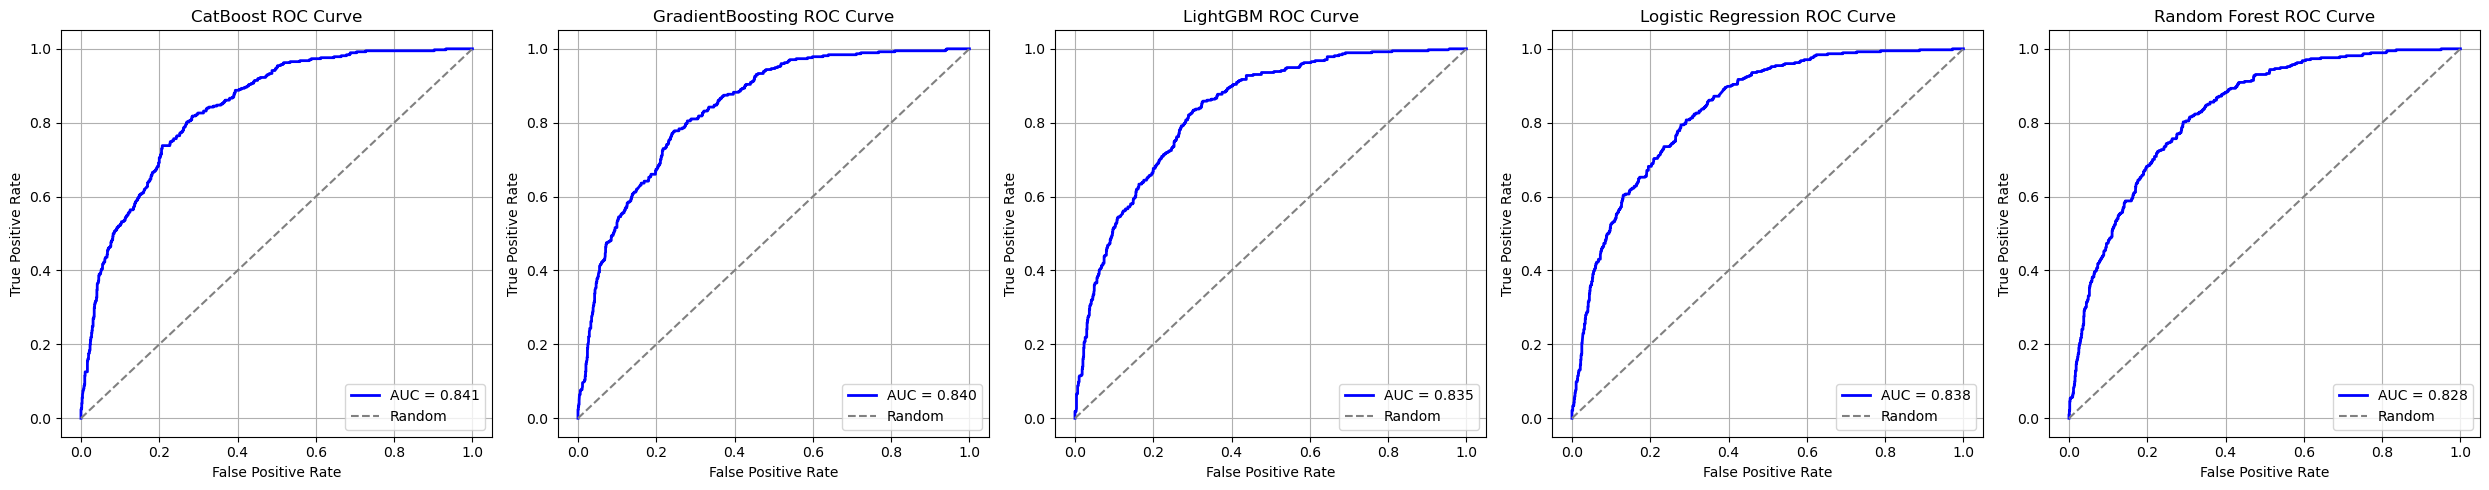

Tuned Models Performance Summary


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,CatBoost,0.776,0.568,0.650,0.606,0.841
1,GradientBoosting,0.769,0.554,0.660,0.602,0.840
2,LightGBM,0.779,0.577,0.634,0.604,0.835
3,Logistic Regression,0.743,0.511,0.765,0.612,0.838
4,Random Forest,0.765,0.546,0.684,0.607,0.828


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Models to plot
models_to_plot = {
    "CatBoost": tuned_models["CatBoost"],
    "GradientBoosting": tuned_models["GradientBoosting"],
    "LightGBM": tuned_models["LightGBM"],
    "Logistic Regression": tuned_models["Logistic Regression"],
    "Random Forest": tuned_models["Random Forest"]
}

# Initialize summary table
metrics_summary = []

# Create subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, len(models_to_plot), figsize=(25, 5))

for ax, (name, model) in zip(axes, models_to_plot.items()):
    # Predict probabilities & classes
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Compute ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color='blue', lw=2)
    ax.plot([0,1], [0,1], linestyle='--', color='gray', label='Random')
    ax.set_title(f"{name} ROC Curve", fontsize=12)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    ax.grid(True)
    
    # Collect metrics
    metrics_summary.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1 Score": round(f1_score(y_test, y_pred), 3),
        "ROC AUC": round(auc_score, 3)
    })

plt.tight_layout()
plt.show()

# Display summary table
summary_df = pd.DataFrame(metrics_summary)
print("Tuned Models Performance Summary")
display(summary_df)

# Interpretation and Insights

**Overall Balance of Performance (ROC AUC focus)**

* All models perform **consistently well in ROC AUC**, ranging from **0.828 – 0.841**.
* **CatBoost (0.841)** and **Gradient Boosting (0.840)** are the top performers in terms of discrimination power, meaning they’re best at separating churners from non-churners.

**Accuracy vs. Recall Trade-off**

* **CatBoost (0.776) and LightGBM (0.779)** give the **highest accuracy**, but their recall (~0.65) is slightly lower than Logistic Regression.
* **Logistic Regression** sacrifices accuracy (**0.743**) for much higher recall (**0.765**).

  * This means Logistic Regression catches more actual churners, but with more false alarms.
* **Random Forest (Recall 0.684)** provides a middle ground, higher recall than boosting methods but lower than Logistic Regression.

**Precision vs. Recall**

* Precision is **modest across all models** (0.51 – 0.58).

  * **LightGBM (0.577)** and **CatBoost (0.568)** strike a better balance, meaning fewer false churn alerts compared to Logistic Regression.
  * Logistic Regression has the **lowest precision (0.511)** → it flags too many false churners, but its recall is strongest.

**F1 Score (balance of Precision & Recall)**
      
* The **best balance (F1 ≈ 0.606–0.612)** is shared across **CatBoost, GradientBoosting, Logistic Regression, and Random Forest**.
* This shows that tuning has leveled the playing field: no single model dominates across all metrics.

**Key Insights for Decision Making**

* **If the goal is to maximize churn detection (Recall)** → Logistic Regression is best (0.765). Useful for retention campaigns where missing a churner is very costly.
* **If the goal is overall balanced performance (Accuracy + ROC AUC)** → CatBoost and LightGBM are the most reliable.
* **If interpretability is important** → Logistic Regression is simpler to explain to business stakeholders, though less precise.
* **If robustness and generalization matter** → CatBoost edges slightly ahead with the best combination of **ROC AUC (0.841)** and good Accuracy/Precision/Recall.

**So in practice:**

* Use **CatBoost/LightGBM** as main churn prediction models.
* Keep **Logistic Regression** as a benchmark (especially for recall-sensitive use cases).
* Random Forest and GradientBoosting are competitive but offer no major advantage after tuning.

# Final Model for Deployment 

### Based on your tuned results:

| Model                   | Accuracy | Precision | Recall    | F1    | ROC AUC   |
| ----------------------- | -------- | --------- | --------- | ----- | --------- |
| **CatBoost**            | 0.776    | 0.568     | 0.650     | 0.606 | **0.841** |
| **GradientBoosting**    | 0.769    | 0.554     | 0.660     | 0.602 | 0.840     |
| **LightGBM**            | 0.779    | 0.577     | 0.634     | 0.604 | 0.835     |
| **Logistic Regression** | 0.743    | 0.511     | **0.765** | 0.612 | 0.838     |
| **Random Forest**       | 0.765    | 0.546     | 0.684     | 0.607 | 0.828     |


### Recommendation:

* **Final Deployment Model: CatBoost**

  * **Why?**

    * Highest **ROC AUC (0.841)** → best at distinguishing churners vs. non-churners.
    * Strong balance between Accuracy (0.776) and Recall (0.650).
    * Handles categorical features & imbalanced data very well (important in churn problems).
    * More robust and generalizable compared to Random Forest (which tends to overfit).

* **Alternative (Recall-Focused): Logistic Regression**

  * If the business absolutely **must minimize missed churners** (maximize Recall = 0.765), Logistic Regression can be deployed alongside CatBoost as a secondary benchmark.
  * But it has much lower precision, meaning more false positives → unnecessary retention costs.


### Final Deployment Strategy:

* **Primary model for deployment:** **CatBoost** (balanced, strong ROC AUC, reliable).
* **Backup model / business scenario testing:** **Logistic Regression** (when recall is more critical).

# Feature importance
Feature importance highlights which variables most influence churn predictions. It helps identify key churn drivers, prioritize retention actions, improve model interpretability, reduce unnecessary features, and monitor changing customer behaviors. In short, it turns model predictions into actionable business insights.

In [37]:
# Fit normally
cat_pipe.fit(X_train, y_train)

# Inject feature names into the trained CatBoost model
cat_pipe.named_steps['model'].set_feature_names(
    cat_pipe.named_steps['preprocessor'].get_feature_names_out()
)

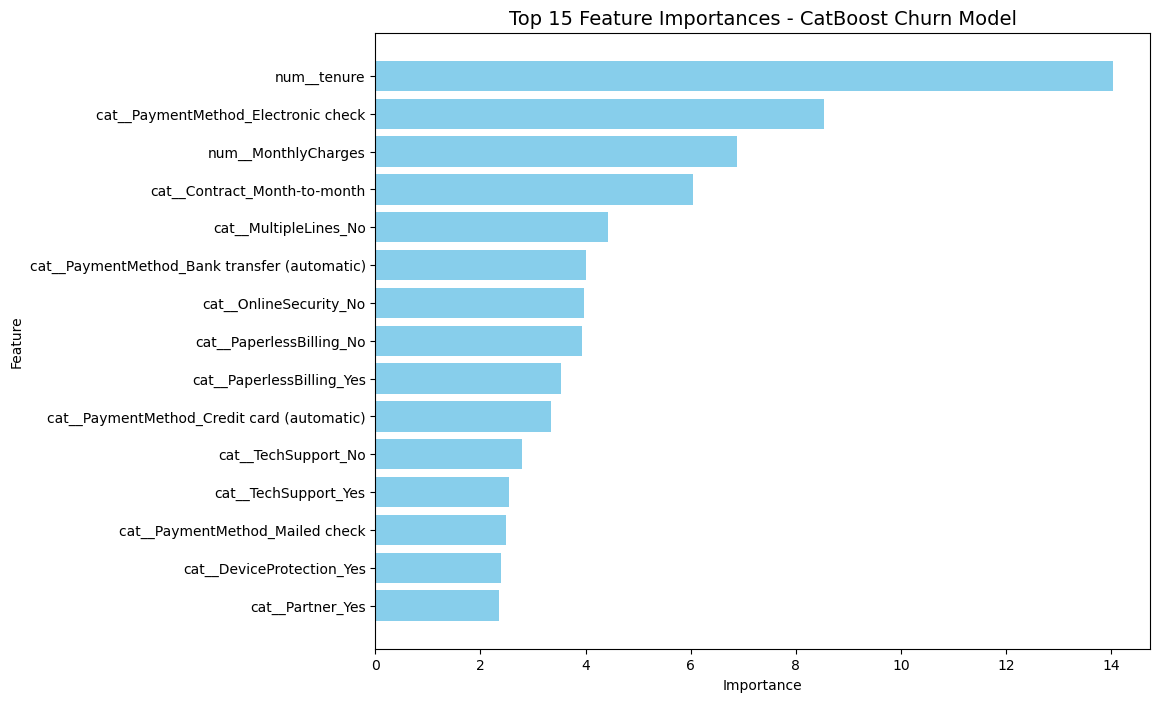

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

catboost_model = cat_pipe.named_steps['model']

# Force feature importances even without metadata
feature_importances = catboost_model.get_feature_importance(type='FeatureImportance')

# Get transformed feature names manually
feature_names = cat_pipe.named_steps['preprocessor'].get_feature_names_out()

# Build DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10,8))
plt.barh(fi_df.head(15)['Feature'], fi_df.head(15)['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - CatBoost Churn Model", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Interpretation and Insights: Top 15 Feature Importance – CatBoost Churn Model

**Tenure (`num__tenure`) – 14.05**

   * The most important predictor. Longer-tenured customers are less likely to churn, highlighting the importance of early retention strategies.

**Payment Method – Electronic Check (`cat__PaymentMethod_Electronic check`) – 8.53**

   * Customers paying via electronic check are more likely to churn, suggesting payment method may influence satisfaction or reliability perception.

**Monthly Charges (`num__MonthlyCharges`) – 6.89**

   * Higher monthly charges increase churn likelihood, indicating price sensitivity.

**Contract – Month-to-Month (`cat__Contract_Month-to-month`) – 6.03**

   * Customers on month-to-month contracts are more prone to leave versus long-term contracts. Shows value in promoting yearly or two-year contracts.

**Multiple Lines – No (`cat__MultipleLines_No`) – 4.43**

   * Customers without multiple lines may be less engaged with services, slightly increasing churn risk.

**Payment Method – Bank Transfer (Automatic) (`cat__PaymentMethod_Bank transfer (automatic)`) – 4.02**

   * This method reduces churn risk compared to electronic checks, possibly due to automation convenience.

**Online Security – No (`cat__OnlineSecurity_No`) – 3.97**

   * Lack of online security service is associated with higher churn, indicating customers value security features.

**Paperless Billing – No (`cat__PaperlessBilling_No`) – 3.92**

   * Traditional billing customers slightly more likely to stay; paperless billing customers are mixed in importance (next feature).

**Paperless Billing – Yes (`cat__PaperlessBilling_Yes`) – 3.54**

   * Confirms the billing preference impacts churn; convenience of paperless billing may not fully offset dissatisfaction elsewhere.

**Payment Method – Credit Card (Automatic) (`cat__PaymentMethod_Credit card (automatic)`) – 3.34**

    * Automatic payments reduce churn risk moderately.

**Tech Support – No (`cat__TechSupport_No`) – 2.80**

    * Absence of tech support is linked to higher churn; access to helpdesk matters for retention.

**Tech Support – Yes (`cat__TechSupport_Yes`) – 2.55**

    * Availability of tech support reduces churn likelihood, supporting the previous point.

**Payment Method – Mailed Check (`cat__PaymentMethod_Mailed check`) – 2.48**

    * Customers paying via mailed check are moderately less likely to churn compared to electronic check users.

**Device Protection – Yes (`cat__DeviceProtection_Yes`) – 2.39**

    * Having device protection slightly reduces churn risk; indicates perceived service value.

**Partner – Yes (`cat__Partner_Yes`) – 2.36**

    * Customers with partners are marginally less likely to churn, suggesting family/shared plans slightly increase retention.

### Key Takeaways

* **Tenure and contract type** are the strongest indicators of churn—focus retention efforts on new and month-to-month customers.
* **Billing and payment methods** heavily influence churn: electronic checks are risky, while automated payments reduce churn.
* **Service features** like online security, tech support, and device protection contribute meaningfully to retention.
* Businesses can **prioritize interventions** on top predictors to reduce churn and improve loyalty programs.

# Outcome

This project aimed to **predict customer churn** in a telecom company and uncover the **key drivers influencing customer departure**.

### Data Overview & Challenges

* **Dataset:** 7,043 customers, 21 features (demographics, services, billing, payment, churn).
* **Target Imbalance:** Only **26.5% churners** → applied **SMOTE oversampling** to balance classes.
* **Data Cleaning:** *TotalCharges* converted from object → float for numeric analysis.

### Key Observations

* **Tenure:** Customers with **<1 year tenure** show ~50% churn probability.
* **Charges & Contract:** High monthly charges + **month-to-month contracts** strongly linked to churn.
* **Service Usage:** Lack of **online security, tech support, and device protection** increases churn risk.
* **Demographics:** Variables like gender or seniority are weak predictors individually but interact with **contract type** and **charges**.

### Modeling & Performance

* **Models Tested:** CatBoost, Gradient Boosting, LightGBM, Logistic Regression, Random Forest.
* **Baseline:** ROC AUC across models ranged **0.78 – 0.84**, recall was moderate on minority churn class.
* **With SMOTE:** Significant boost in recall (e.g., Logistic Regression recall = **0.765**).
* **Hyperparameter Tuning:** Improved overall balance between recall, precision, and AUC.
* **Tuned Results (Test Performance):**

| Model                   | Accuracy | Precision | Recall    | F1    | ROC AUC   |
| ----------------------- | -------- | --------- | --------- | ----- | --------- |
| **CatBoost**            | 0.776    | 0.568     | 0.650     | 0.606 | **0.841** |
| **GradientBoosting**    | 0.769    | 0.554     | 0.660     | 0.602 | 0.840     |
| **LightGBM**            | 0.779    | 0.577     | 0.634     | 0.604 | 0.835     |
| **Logistic Regression** | 0.743    | 0.511     | **0.765** | 0.612 | 0.838     |
| **Random Forest**       | 0.765    | 0.546     | 0.684     | 0.607 | 0.828     |

**Insights:**

* **CatBoost** delivered the **highest ROC AUC (0.841)** and consistent balance → best overall performer.
* **Logistic Regression** achieved the **highest recall (0.765)** → useful if minimizing missed churners is the top priority.
* **LightGBM & Gradient Boosting** showed strong balanced performance, close to CatBoost.
* **Random Forest** was solid but slightly weaker in ROC AUC compared to boosting methods.

### Feature Importance – Top 5 Drivers of Churn

| Rank | Feature                        | Importance |
| ---- | ------------------------------ | ---------- |
| 1    | Tenure                         | 14.05      |
| 2    | PaymentMethod_Electronic check | 8.53       |
| 3    | MonthlyCharges                 | 6.89       |
| 4    | Contract_Month-to-month        | 6.03       |
| 5    | MultipleLines_No               | 4.43       |

**Insight:** Early-tenure, high-paying customers on **flexible contracts without essential services** are at the highest churn risk.

### Deployment Readiness

* Final model: **CatBoost pipeline (with preprocessing + SMOTE)** saved as **`catboost_pipeline.pkl`**.
* Alternative recall-focused deployment: **Logistic Regression**.
* Deployable via **Streamlit** or web API for **real-time churn prediction** and **customer retention strategies**.


### Key Takeaways & Recommendations

* **Focus on new customers (<12 months):** early engagement & retention incentives.
* **Target high-risk groups:** high charges, month-to-month contracts, missing service add-ons.
* **Enhance service bundles:** promote **tech support, online security, device protection**.
* **Proactive retention > acquisition:** Machine learning enables **early detection of churners**, cutting operational and marketing costs.


### Overall Outcome

By combining **five advanced ML models**, hyperparameter tuning, and **business-focused insights**, this project delivers a **robust predictive framework** for reducing churn.
The **CatBoost model** is recommended for deployment, supported by Logistic Regression as a **recall-focused backup**, enabling telecom providers to **retain profitable customers** and make **data-driven retention decisions**.

# SAVING AND TESTING MODEL
Saving and testing a model ensures that a trained machine learning model can be reused, validated, and deployed reliably.

Reasons:
 - Persistence: Saving the model (e.g., with joblib or pickle) allows you to reuse it later without retraining.
 - Validation: Testing the saved model on new or hold-out data ensures it performs as expected and hasn’t been corrupted.
 - Deployment: A saved and tested model can be integrated into production systems, applications, or dashboards.
 - Reproducibility: Ensures that results are consistent and can be shared or audited.

In short: Saving and testing a model preserves it for reuse, verifies its performance, and enables deployment in real-world applications.

In [39]:
# importing necessary library
import joblib

In [40]:
# CatBoost pipeline with SMOTE
cat_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),              
    ('smote', SMOTE(random_state=42)),           
    ('model', CatBoostClassifier(                
        random_state=42, 
        verbose=0                                
    ))
])

In [41]:
# Fit full pipeline (with SMOTE for training)
cat_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Partner', 'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000001D0CE276DB0>)])

In [42]:
# Save the trained pipeline model

joblib.dump(cat_pipe, "catboost_pipeline.pkl")
print("Model saved as catboost_pipeline.pkl")

Model saved as catboost_pipeline.pkl


# Challenges Observed: Insights from Data, Features, and Class Imbalance

**Class Imbalance**

* Only ~27% of customers churned vs ~73% retained.
* This imbalance made it harder for models to learn churn patterns, often reducing recall for the minority class.
* **SMOTE oversampling** improved sensitivity (recall) but slightly lowered overall accuracy, reflecting the trade-off between identifying churners and maintaining precision.

**Feature Complexity & Interaction**

* Features like **contract type, payment method, and multiple service subscriptions** had complex interactions with churn.
* Models struggled to capture these patterns without proper encoding and preprocessing.

**Limited Predictive Power for Certain Features**

* Variables such as **SeniorCitizen** and **PhoneService** showed weak correlation with churn.
* This meant models leaned more heavily on stronger predictors (**tenure, monthly charges, contract type**) → limiting the dimensionality of useful information.

**Data Quality Challenges**

* The *TotalCharges* column was stored as object and needed conversion to numeric.
* **Outliers and skewed distributions** in numerical features (e.g., tenure, monthly charges) risked affecting stability and consistency of model performance.

**Trade-offs Between Metrics**

* Models like **CatBoost** achieved the **highest ROC AUC (0.841)** but had moderate precision and recall.
* **Logistic Regression** maximized recall (0.765) but at the cost of precision (0.511).
* This highlighted the difficulty of balancing **overall accuracy** with the business need to correctly identify churners.

### Summary

The models faced typical churn prediction challenges: **class imbalance, feature complexity, skewed distributions, and metric trade-offs**.
Despite these, **CatBoost emerged as the most balanced and reliable model** for deployment, while the results also reinforce that **careful preprocessing, balancing, and feature engineering** are critical for sustained predictive performance.

# Recommendations and Future Work

## Recommendations

### Address Class Imbalance

* Apply advanced resampling techniques like **ADASYN**, **SMOTE-ENN**, or **cost-sensitive learning**.
* Regularly evaluate metrics **beyond accuracy** (Precision, Recall, AUC) to ensure balanced churn detection.

### Feature Engineering & Data Enhancement

* Derive new features from **usage patterns**, **service calls**, or **complaint history**.
* Apply more expressive encodings (e.g., **target encoding** for categorical variables like payment method).
* Incorporate **temporal features** (e.g., sudden bill increases, recent contract changes).

### Model Optimization & Ensemble Techniques

* Continue **hyperparameter tuning** with Bayesian Optimization or RandomizedSearch for efficiency.
* Explore **stacked ensembles** (e.g., blending Logistic Regression, CatBoost, and Random Forest) to combine strengths.
* Test **cost-sensitive versions of Gradient Boosting** for imbalance handling.

### Incorporate External & Behavioral Data

* Add external data such as **competitor pricing** or **market promotions** to capture churn triggers.
* Leverage **customer sentiment (chat logs, reviews, call transcripts)** for behavioral signals.

### Continuous Monitoring & Feedback Loop

* Deploy monitoring pipelines to detect **model drift** over time.
* Collect outcomes from retention campaigns and use them as **feedback data** for retraining.
* Automate **periodic re-training** on new churn patterns.

## Future Work

* Investigate **deep learning models (RNNs, LSTMs, Transformers)** for sequential behavior analysis.
* Run **A/B tests** on retention strategies guided by churn predictions.
* Expand dataset with **longitudinal data** for time-aware modeling.


**Key Takeaway:**
While CatBoost provided the most balanced performance for deployment, future improvements should focus on **handling class imbalance more effectively, enriching feature space, and leveraging ensemble or deep learning methods**. This ensures the churn prediction framework remains **accurate, adaptive, and business-relevant** over time.

# Alignment Between Objectives, Observed Outcomes, and Recommendations / Future Work

| **Objective**                              | **Observed Outcomes**                                                                                                                                                                                                                                                                                                   | **Recommendations / Future Work**                                                                                                                                                                                                  |
| ------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Identify key drivers of churn**          | Tenure, payment method (electronic check), monthly charges, contract type, and lack of value-added services (online security, tech support, device protection) were the strongest predictors of churn.                                                                                                                  | Focus retention strategies on high-risk groups (new customers, high charges, month-to-month contracts). Explore additional behavioral features (usage frequency, complaints, service tickets) for richer insights.                 |
| **Develop predictive churn models**        | Tuned **CatBoost** achieved the best trade-off between accuracy, recall, and ROC AUC (0.841). Other models (LightGBM, Gradient Boosting, Random Forest, Logistic Regression) showed comparable AUCs but different trade-offs (Logistic Regression higher recall, Random Forest stronger accuracy but weaker precision). | Continue refining with **cross-validation, hyperparameter tuning, and stacked ensemble methods**. Periodically re-train models to prevent drift. Evaluate cost-sensitive algorithms to balance false positives vs false negatives. |
| **Address class imbalance**                | Target variable was highly imbalanced (~73% retained vs 27% churned). SMOTE improved recall for minority class but slightly reduced precision and accuracy.                                                                                                                                                             | Apply **advanced sampling techniques** (SMOTE-ENN, ADASYN) or **cost-sensitive learning**. Regularly monitor recall vs precision trade-offs to maintain business alignment.                                                        |
| **Provide actionable business insights**   | High churn risk segments identified: **customers in first year**, **month-to-month contracts**, **electronic check payments**, and **high monthly charges**.                                                                                                                                                            | Design **targeted retention campaigns** (loyalty rewards, contract upgrade offers, reduced electronic payment fees). Monitor intervention effectiveness via A/B testing and campaign ROI.                                          |
| **Enable deployment for decision support** | Final **CatBoost pipeline** (with preprocessing + SMOTE) was exported as `catboost_pipeline.pkl`. Ready for real-time prediction in Streamlit/web apps.                                                                                                                                                                 | Deploy model into **CRM dashboards or decision-support tools** for proactive churn flagging. Implement a **feedback loop** from campaign outcomes to continuously improve model performance.                                       |

### Insight

There is a **clear alignment between objectives, observed outcomes, and recommendations**.

* Business goals (retention, revenue protection) align with the **predictive insights** provided.
* CatBoost is the **final deployment model**, but future work should focus on **handling imbalance better, feature enrichment, and ensemble learning**.
* The framework provides both **actionable strategies** (who to target, why they churn) and a **scalable ML system** (ready for deployment + monitoring).

# Conclusion

In today’s competitive telecom industry, predicting customer churn is essential for protecting revenue and sustaining long-term growth. This project combined data analysis, feature engineering, and predictive modeling to generate actionable insights and robust predictive tools.

* **Target Imbalance**: About 73% of customers were retained while 27% churned. This imbalance posed challenges for model learning, but applying SMOTE improved sensitivity to churners without severely compromising overall accuracy.
* **Key Drivers of Churn**: Tenure, payment method, monthly charges, contract type, and service subscriptions were the most influential features. Customers with short tenure, month-to-month contracts, and electronic check payments were at the highest risk of churn.
* **Model Performance**: Among the tested models, CatBoost delivered the most balanced performance across accuracy, recall, F1 score, and ROC AUC. Hyperparameter tuning and cross-validation confirmed its robustness and generalizability.
* **Actionable Insights**: The analysis highlights opportunities for targeted retention strategies, such as loyalty rewards for early-tenure customers, contract upgrades, reduced electronic payment risks, and improved value-added services.

**Final Takeaway**: By leveraging predictive modeling and aligning it with data-driven retention strategies, telecom companies can proactively reduce churn, retain profitable customers, and drive sustainable competitive advantage.